In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('data/train_identity.csv.gz')
df2 = pd.read_csv('data/train_transaction.csv.gz')

In [3]:
# Using TransactionID as index for both data.
df1.set_index('TransactionID',inplace=True)
df2.set_index('TransactionID',inplace=True)

## Looking at the data to check out the values, null value count etc.

In [4]:
df1.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
df1.describe()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,-0.301124,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,2.789446,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,-100.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,0.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [6]:
df1.isnull().sum(axis=0)

id_01              0
id_02           3361
id_03          77909
id_04          77909
id_05           7368
id_06           7368
id_07         139078
id_08         139078
id_09          69307
id_10          69307
id_11           3255
id_12              0
id_13          16913
id_14          64189
id_15           3248
id_16          14893
id_17           4864
id_18          99120
id_19           4915
id_20           4972
id_21         139074
id_22         139064
id_23         139064
id_24         139486
id_25         139101
id_26         139070
id_27         139064
id_28           3255
id_29           3255
id_30          66668
id_31           3951
id_32          66647
id_33          70944
id_34          66428
id_35           3248
id_36           3248
id_37           3248
id_38           3248
DeviceType      3423
DeviceInfo     25567
dtype: int64

In [7]:
df1.shape

(144233, 40)

In [8]:
df2.head

<bound method NDFrame.head of                isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400          68.500         W  13926    NaN   
2987001              0          86401          29.000         W   2755  404.0   
2987002              0          86469          59.000         W   4663  490.0   
2987003              0          86499          50.000         W  18132  567.0   
2987004              0          86506          50.000         H   4497  514.0   
2987005              0          86510          49.000         W   5937  555.0   
2987006              0          86522         159.000         W  12308  360.0   
2987007              0          86529         422.500         W  12695  490.0   
2987008              0          86535          15.000         H   2803  100.0   
2987009              0          86536         117.000         W  17399  111.0  

df2.describe()

In [10]:
df2.isnull().sum(axis=0)

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
                   ...  
V310                  12
V311                  12
V312                  12
V313                1269
V314                1269
V315                1269
V316                  12
V317                  12
V318                  12


In [11]:
df2.shape

(590540, 393)

In [12]:
df1i = df1.index
df2i = df2.index

### Checking if the index we created is unique. And then checking which data is subset of the other, if at all.

In [13]:
# tests to check if the index is unique
df1i.is_unique

True

In [14]:
# tests to check if the index is unique
df2i.is_unique

True

In [15]:
# If this returns 0 rows df1 is a total subset of df2.
df1[~df1.index.isin(df2.index)]

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,


In [16]:
# These are indices in df2 and not in df1.
df2[~df2.index.isin(df1.index)].shape

(446307, 393)

### Validation of the above command.
### This should throw a KeyError because this index should be missing in df1 but available in df2.

df1.loc[2987001]


In [17]:
df1['isFraud'] = df2['isFraud']  #Add isFraud label to the identity DF

In [18]:
#How many items in df1 & df2 are fraud
df1_fraudRatio = df1[df1['isFraud'] == 1].shape[0]/df1.shape[0] #ratio of fraud to total items in identity DF
df2_fraudRatio = df2[df2['isFraud'] == 1].shape[0]/df2.shape[0] #ratio of fraud to total items in all transactions DF

In [19]:
df1_fraudRatio

0.07847025299342036

In [20]:
df2_fraudRatio

0.03499000914417313

# Looking into DF1 (Identity data)
## For each column: Look for intersection between NaN and isFraud. How many isFraud for colN==NaN? Betweeb colN == NaN and isFraud sets, is one a subset of the other.
### is there a point in doing this kind of EDA?

P = set(df1.index[df1['isFraud'] == 1].tolist())
colchk = 'id_24'
Q = set(df1.index[df1[colchk].apply(np.isnan)].tolist())

%matplotlib inline
plt.title('Intersection of Null {} and FRAUD cases'.format(colchk))
venn2([P,Q],set_labels=('Null_{}'.format(colchk),'isFraud'))

#Intersection of null values amongst a couple of features.

colchka = 'id_24'
colchkb = 'id_19'
R = set(df1.index[df1[colchka].apply(np.isnan)].tolist())
S = set(df1.index[df1[colchkb].apply(np.isnan)].tolist())
venn2([R,S],set_labels=('Null_{}'.format(colchka),'Null_{}'.format(colchkb)))

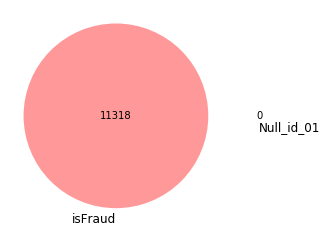

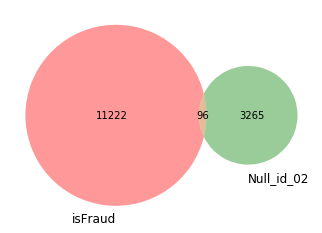

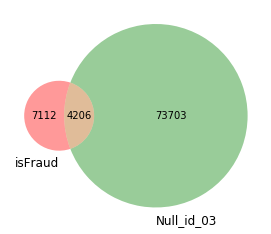

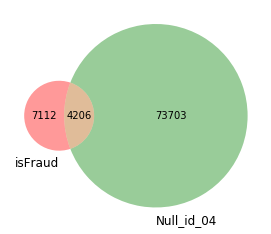

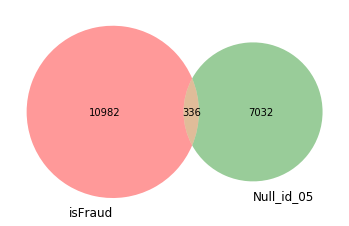

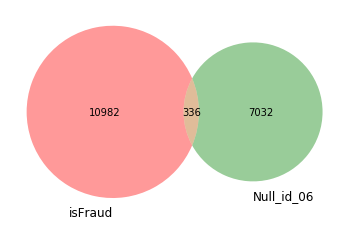

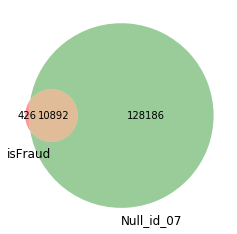

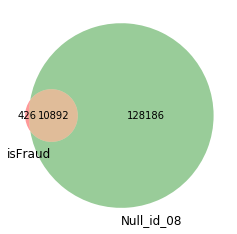

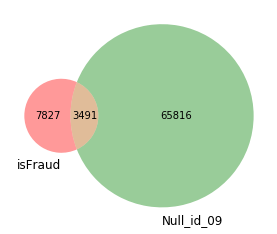

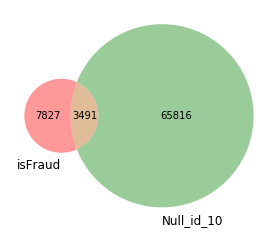

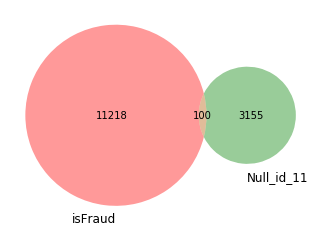

TypeError caught on id_12


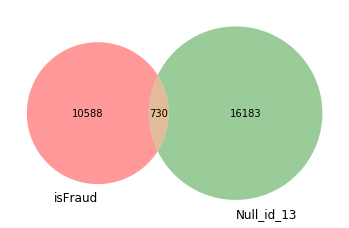

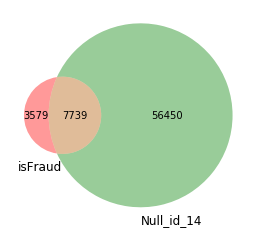

TypeError caught on id_15
TypeError caught on id_16


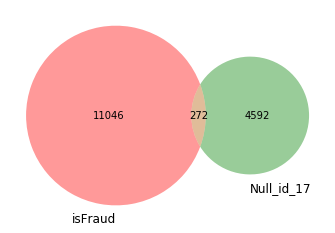

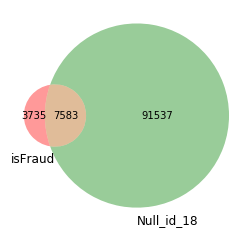

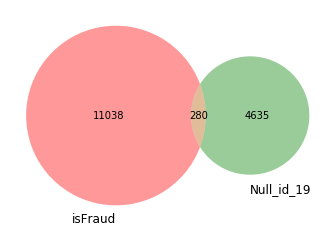

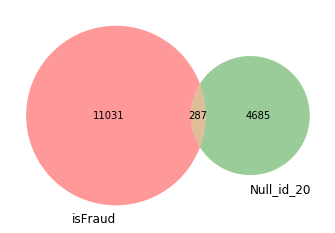

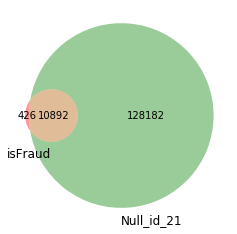

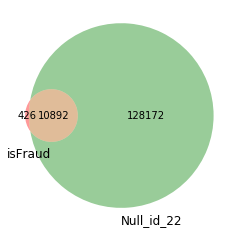

TypeError caught on id_23


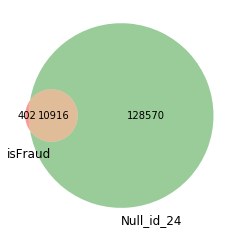

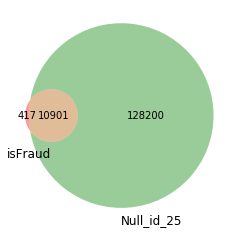

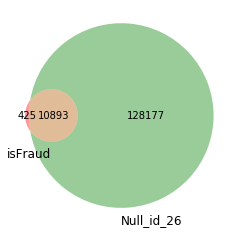

TypeError caught on id_27
TypeError caught on id_28
TypeError caught on id_29
TypeError caught on id_30
TypeError caught on id_31


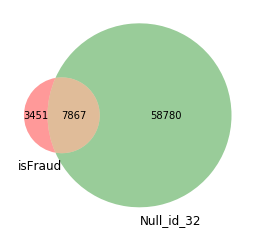

TypeError caught on id_33
TypeError caught on id_34
TypeError caught on id_35
TypeError caught on id_36
TypeError caught on id_37
TypeError caught on id_38
TypeError caught on DeviceType
TypeError caught on DeviceInfo


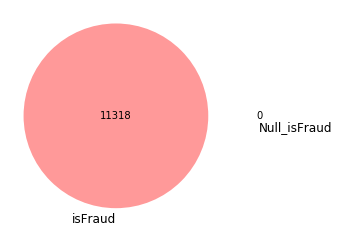

In [21]:
for colchk in df1.columns:
    try:
        venn2([set(df1.index[df1['isFraud'] == 1].tolist()),set(df1.index[df1[colchk].apply(np.isnan)].tolist())],set_labels=('isFraud','Null_{}'.format(colchk)))
        plt.show()
    except (TypeError):
        # isnan is not working on some columns. 
        # just passing them by for now.. Perhaps we need to re-cast those items
        # as NaNs? Or is there a value in "NotFound" ??
        print('TypeError caught on {}'.format(colchk))

# Looking into DF2. Null value and isFraud intersection.

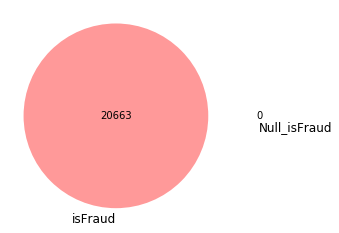

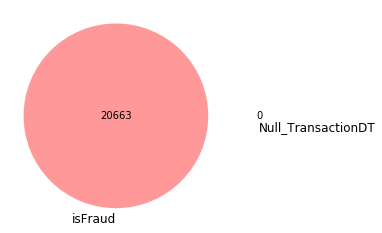

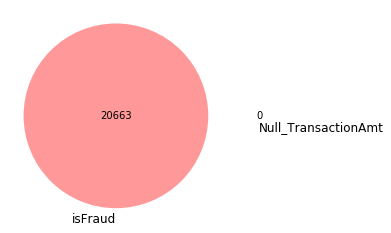

TypeError caught on ProductCD


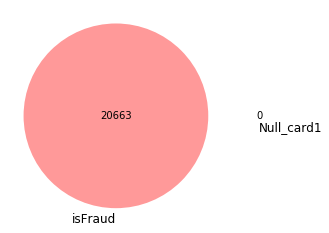

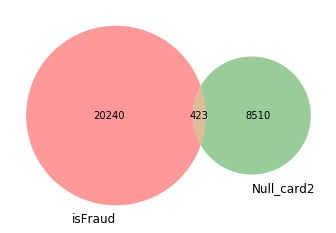

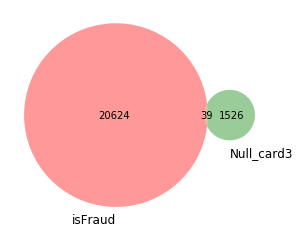

TypeError caught on card4


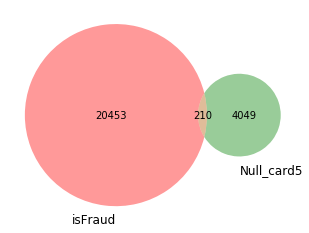

TypeError caught on card6


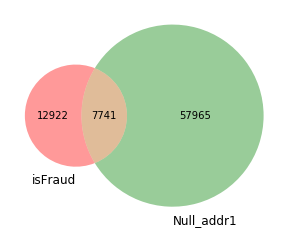

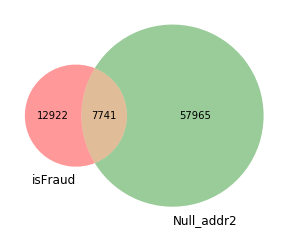

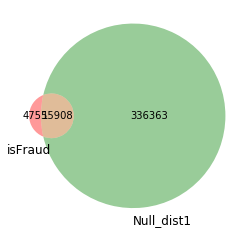

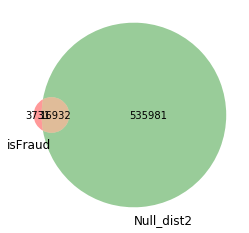

TypeError caught on P_emaildomain
TypeError caught on R_emaildomain


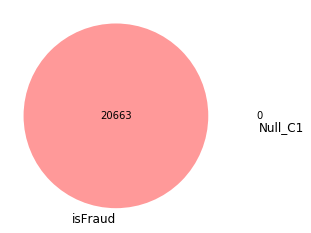

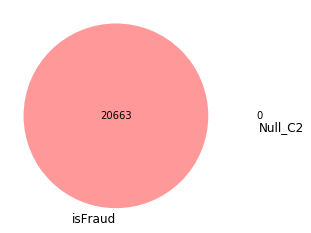

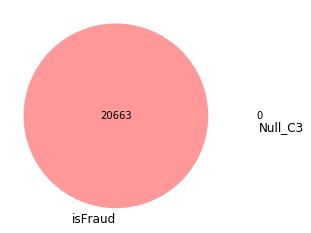

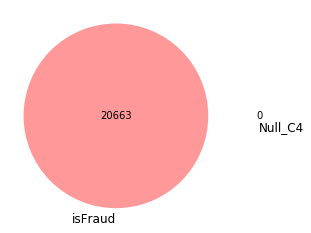

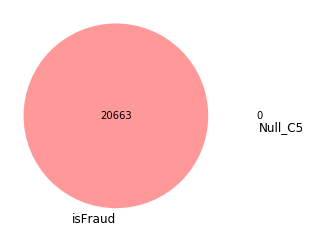

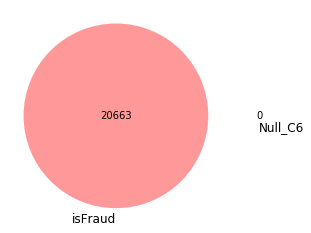

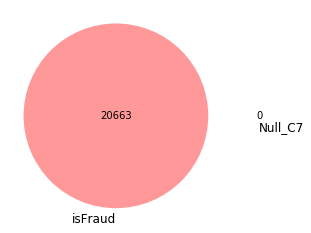

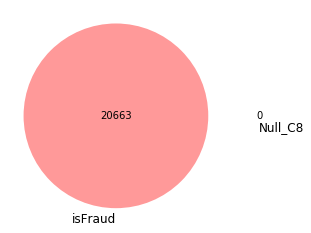

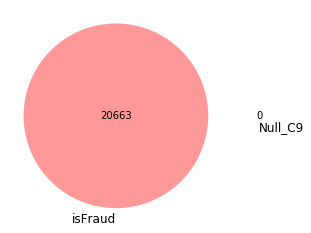

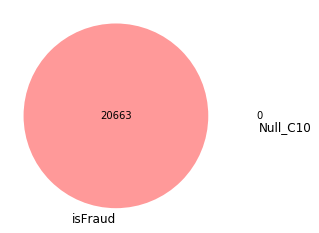

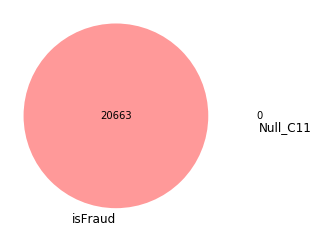

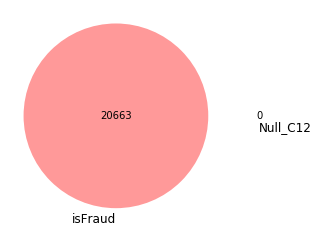

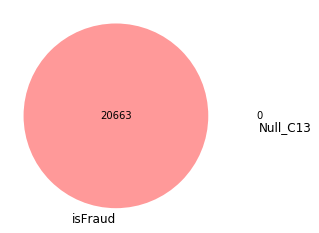

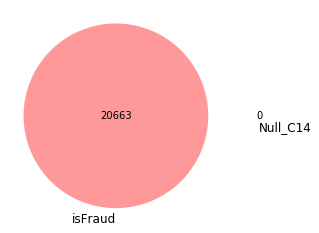

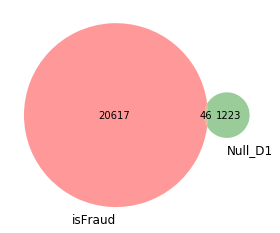

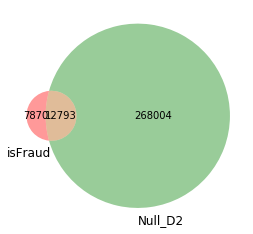

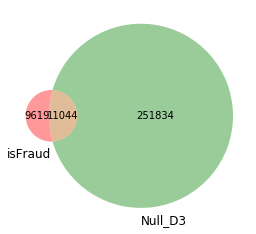

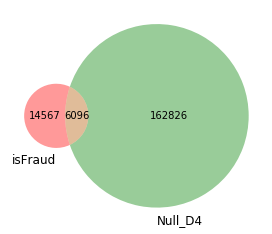

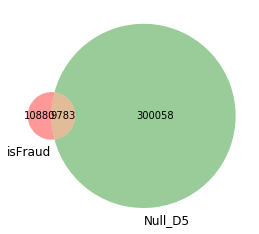

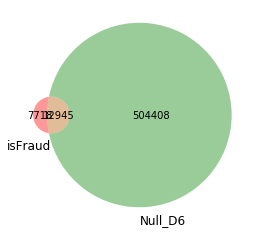

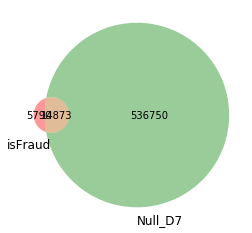

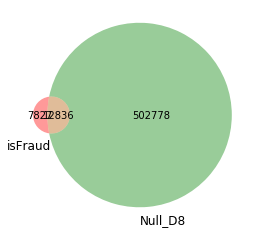

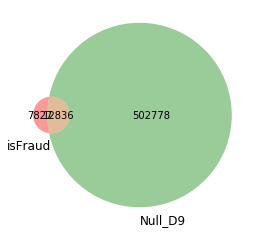

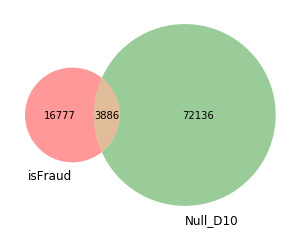

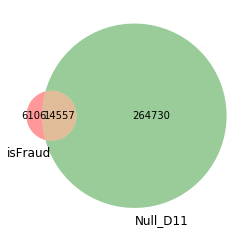

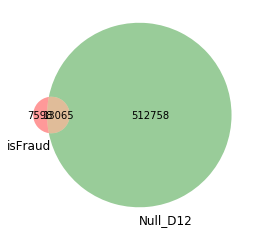

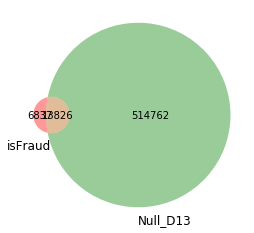

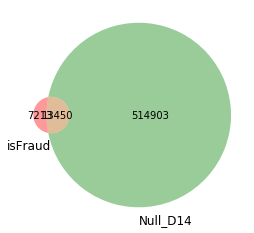

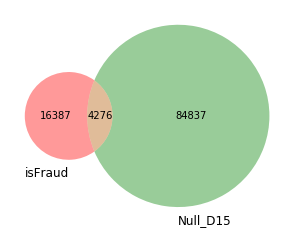

TypeError caught on M1
TypeError caught on M2
TypeError caught on M3
TypeError caught on M4
TypeError caught on M5
TypeError caught on M6
TypeError caught on M7
TypeError caught on M8
TypeError caught on M9


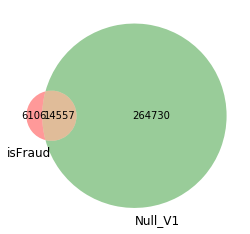

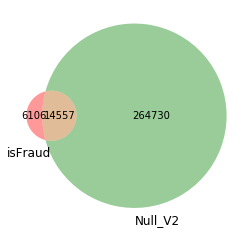

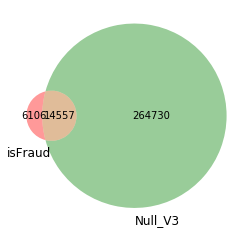

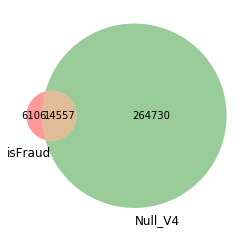

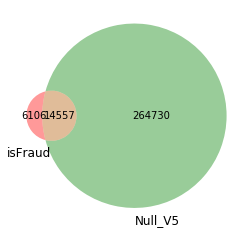

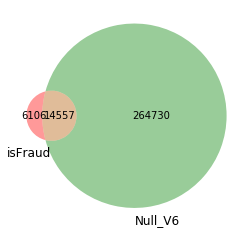

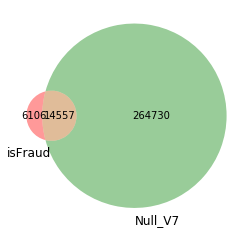

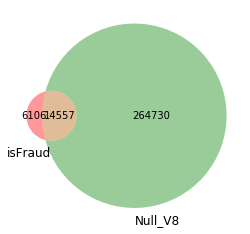

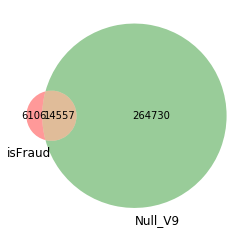

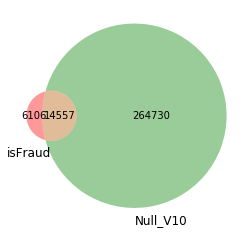

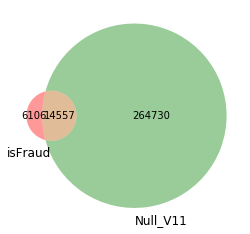

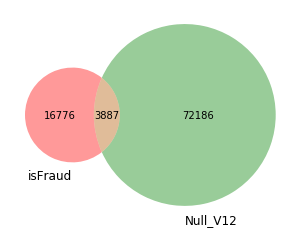

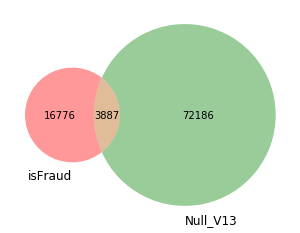

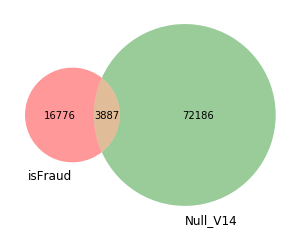

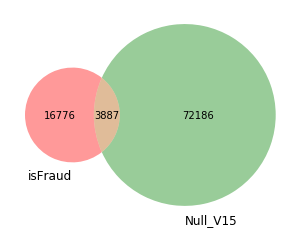

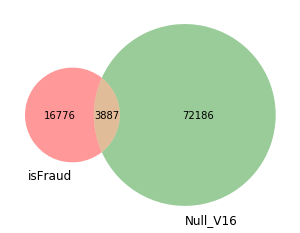

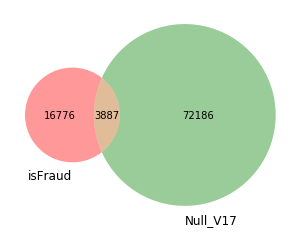

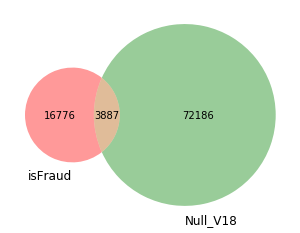

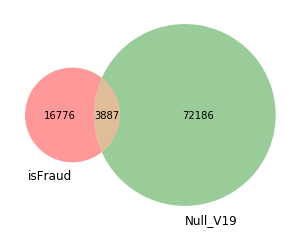

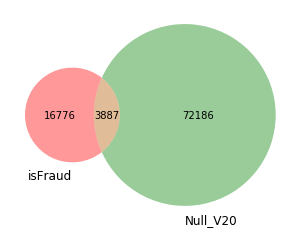

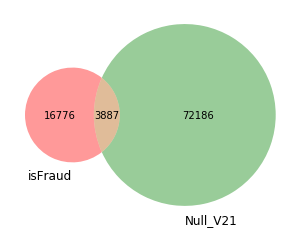

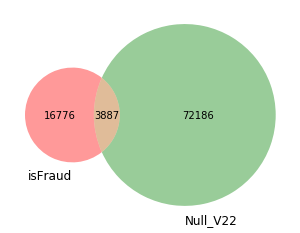

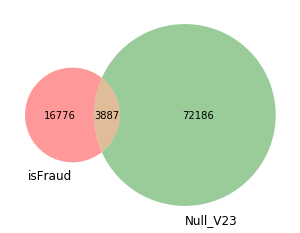

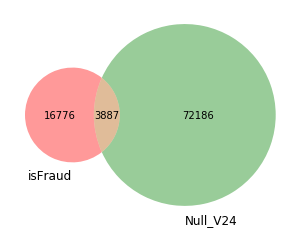

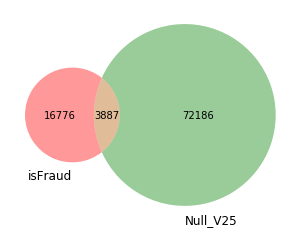

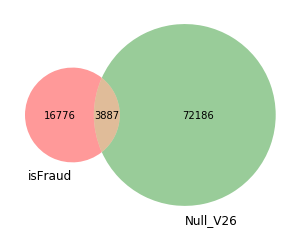

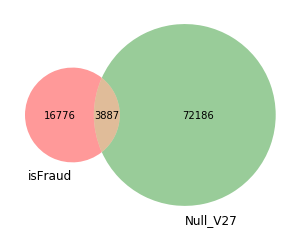

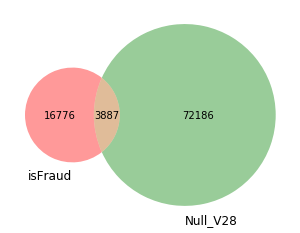

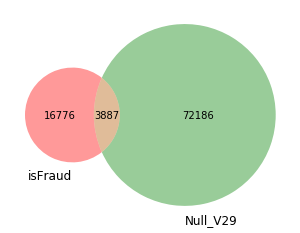

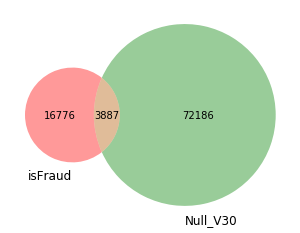

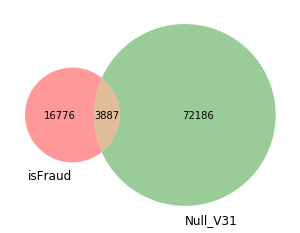

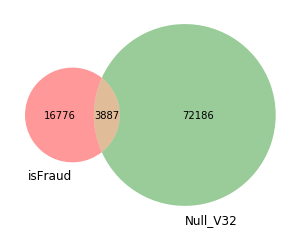

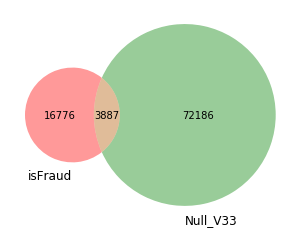

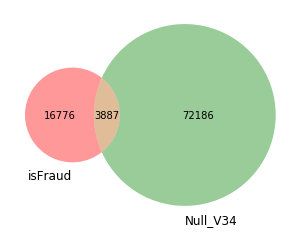

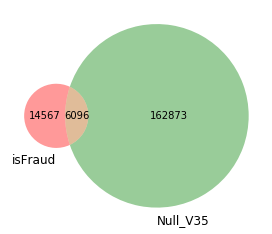

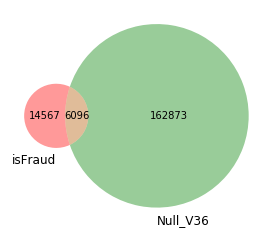

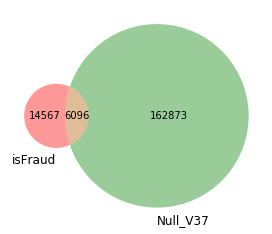

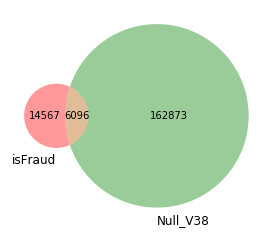

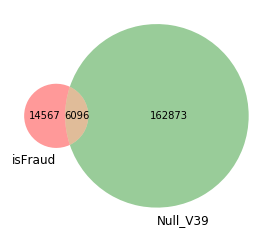

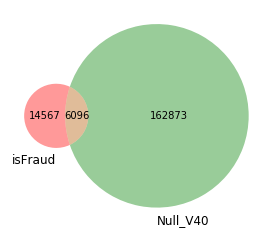

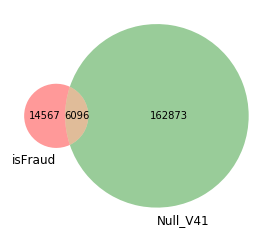

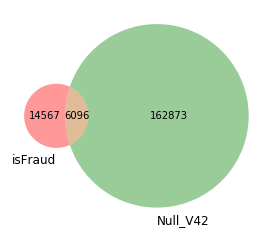

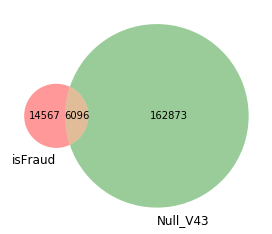

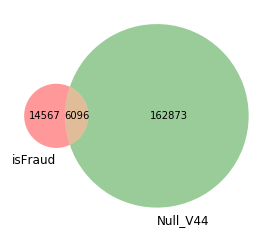

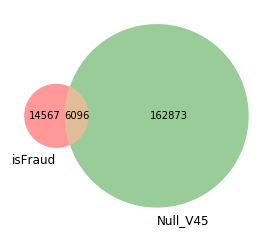

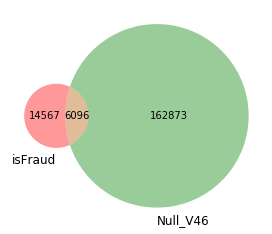

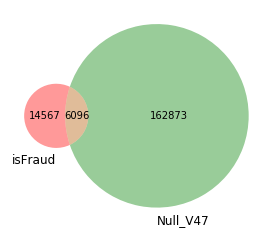

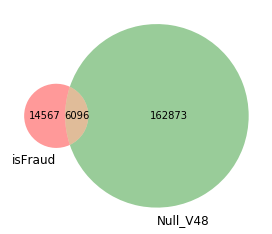

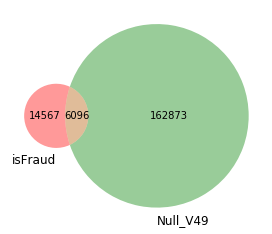

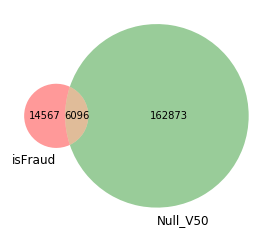

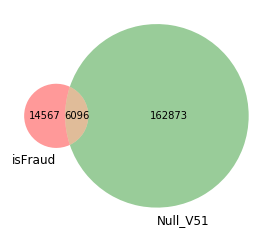

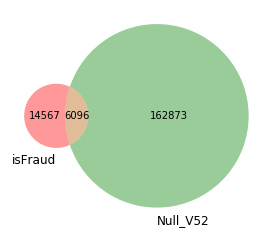

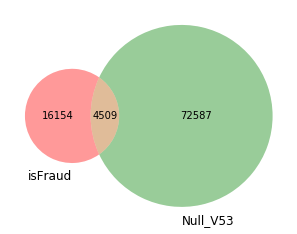

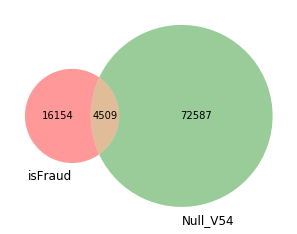

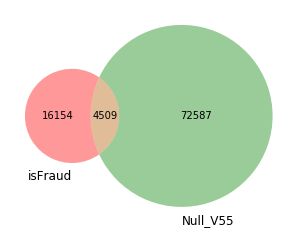

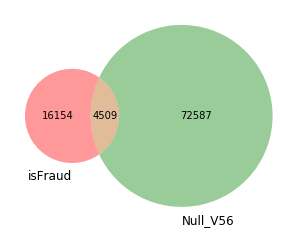

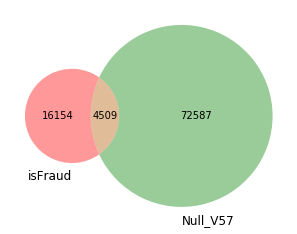

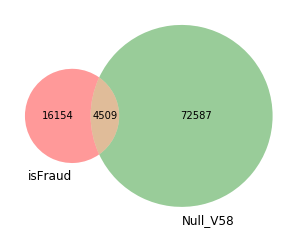

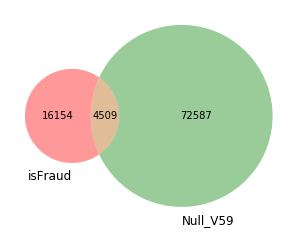

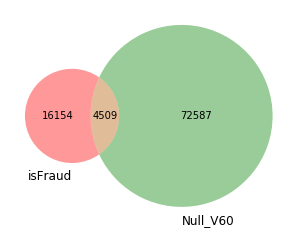

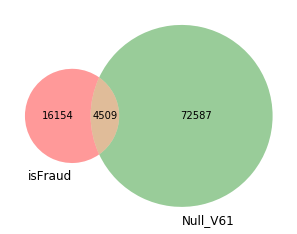

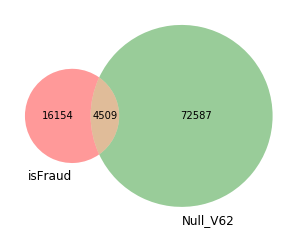

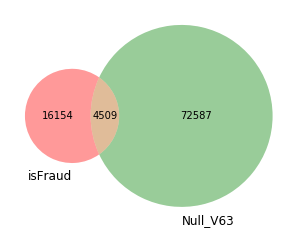

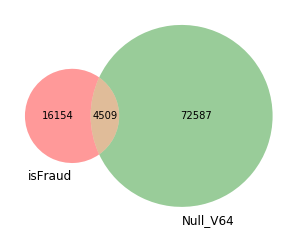

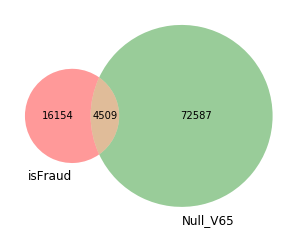

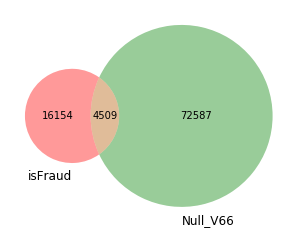

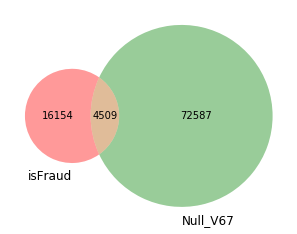

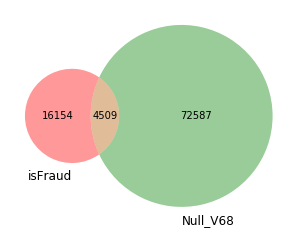

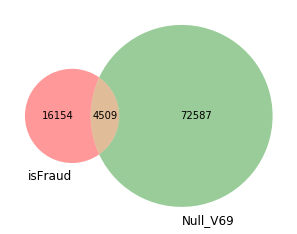

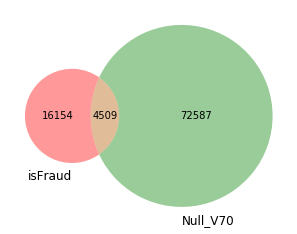

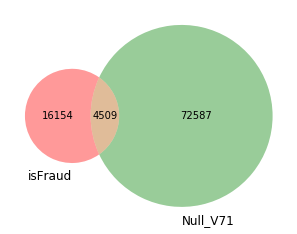

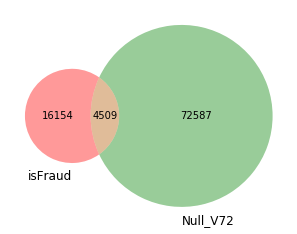

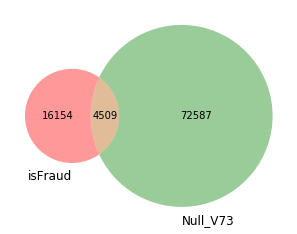

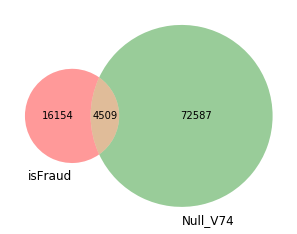

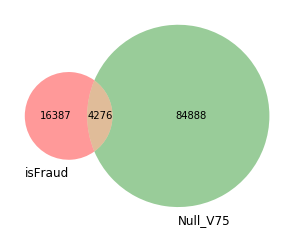

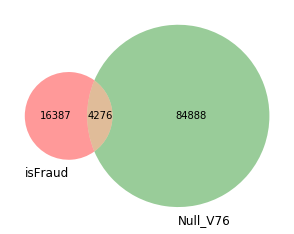

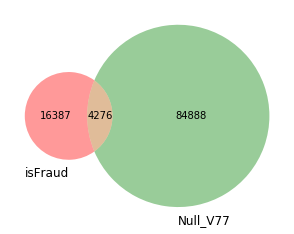

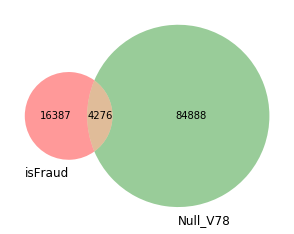

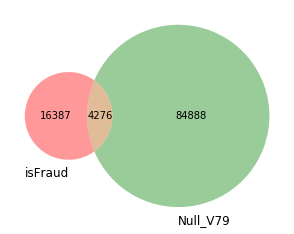

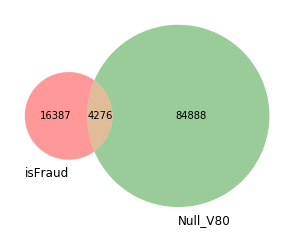

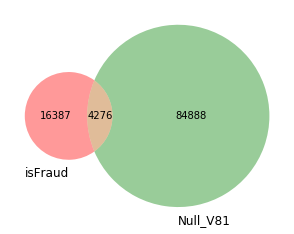

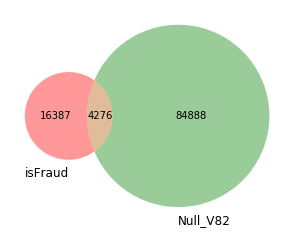

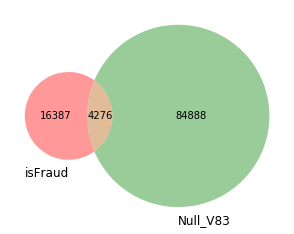

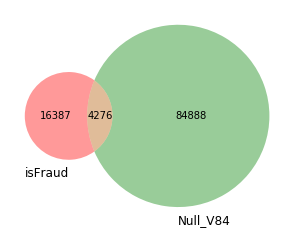

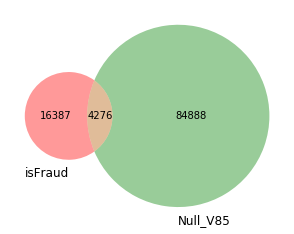

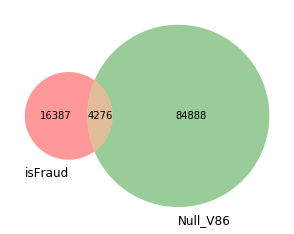

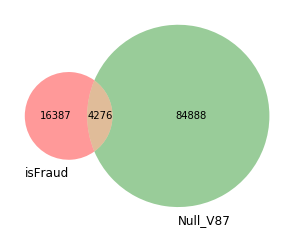

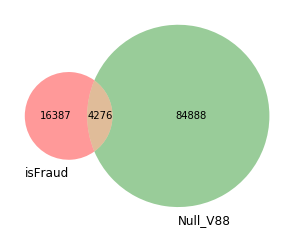

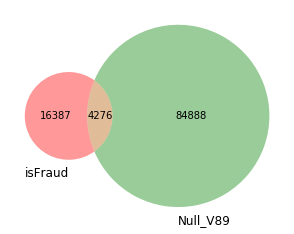

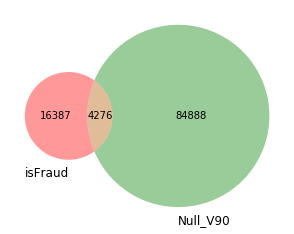

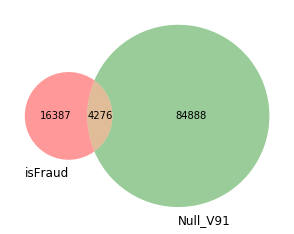

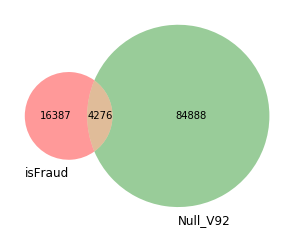

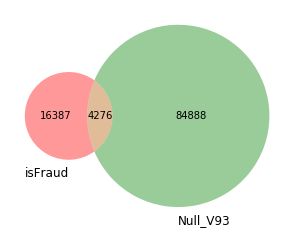

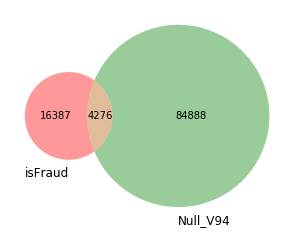

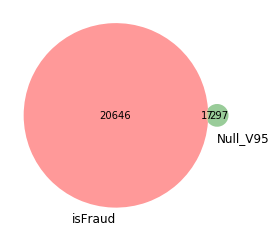

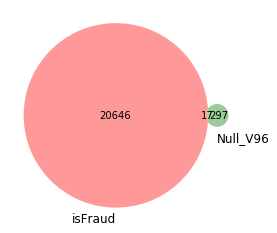

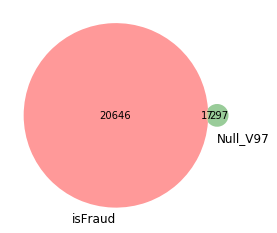

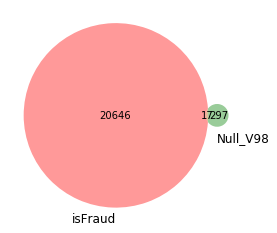

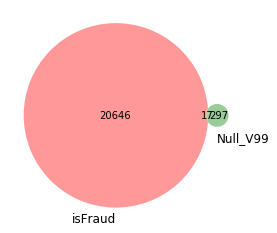

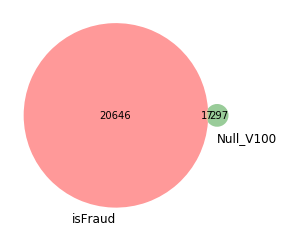

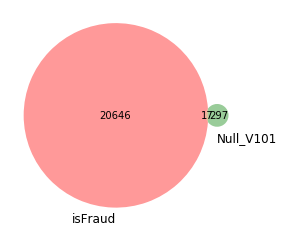

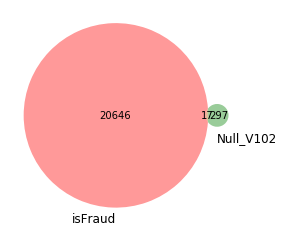

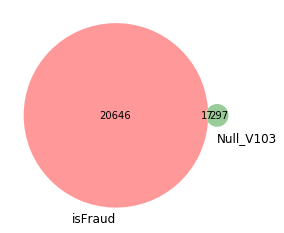

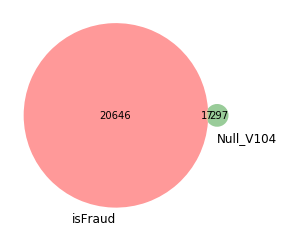

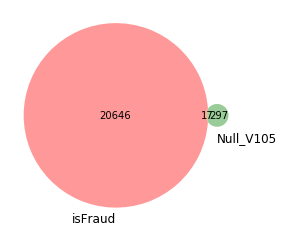

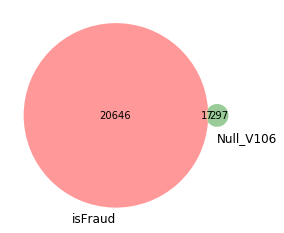

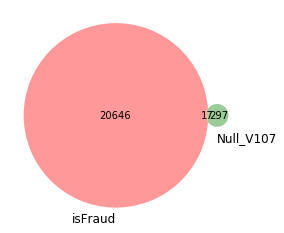

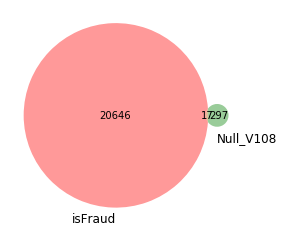

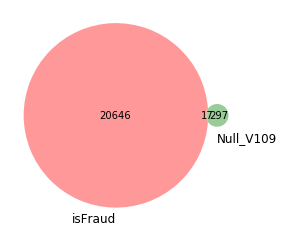

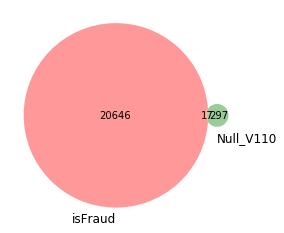

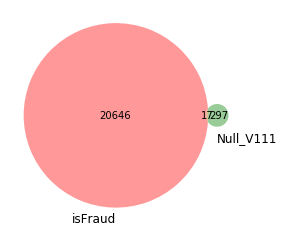

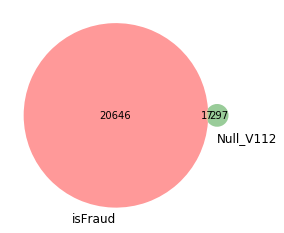

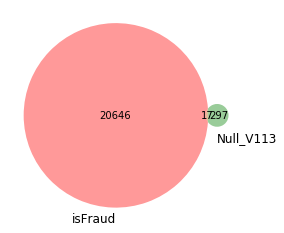

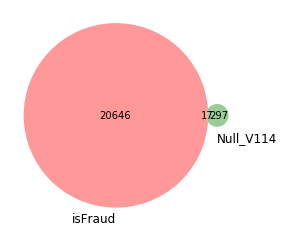

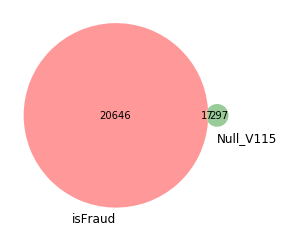

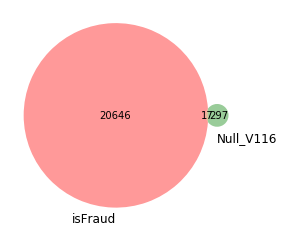

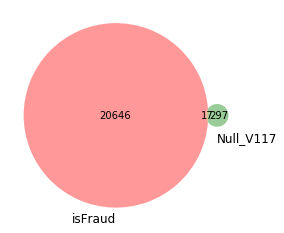

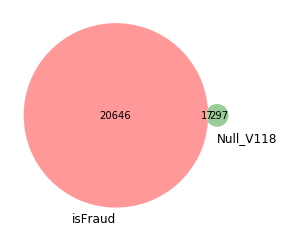

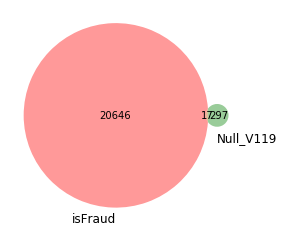

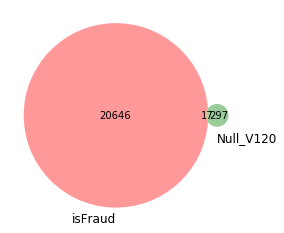

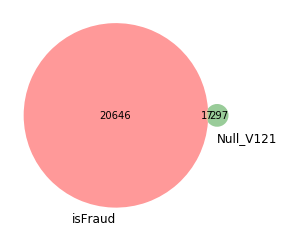

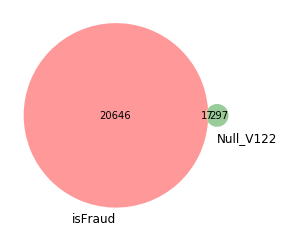

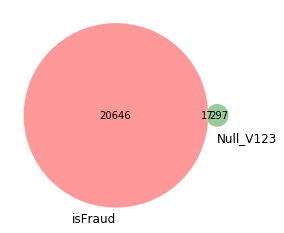

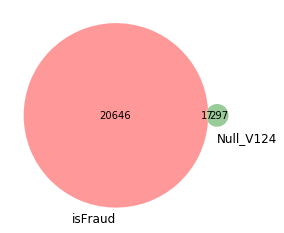

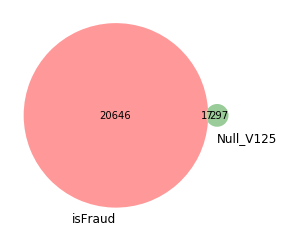

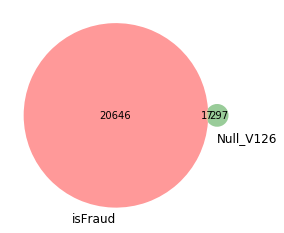

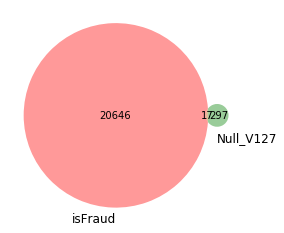

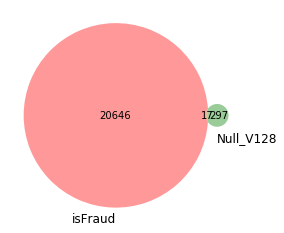

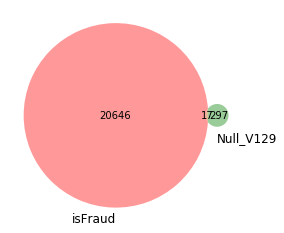

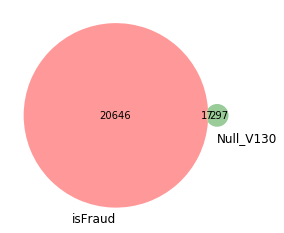

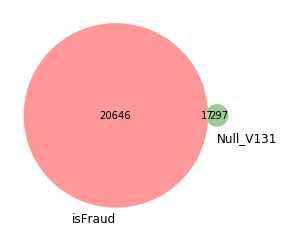

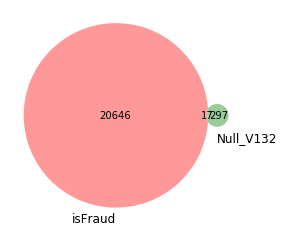

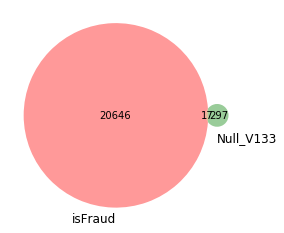

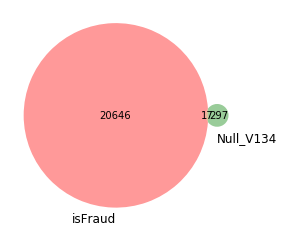

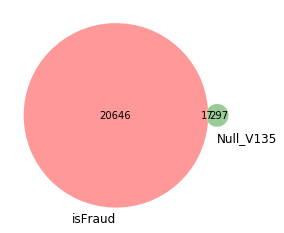

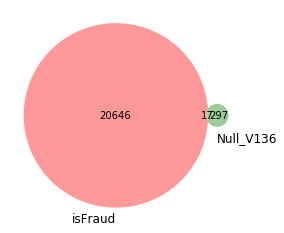

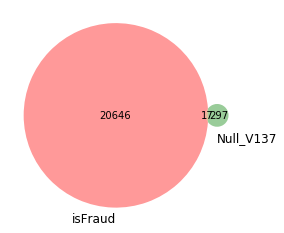

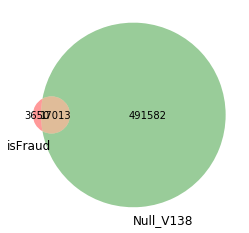

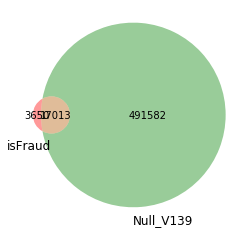

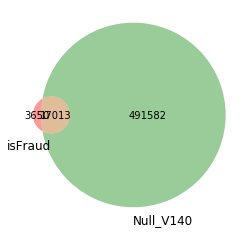

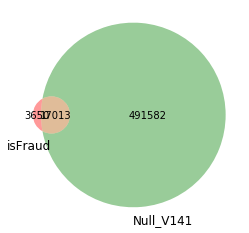

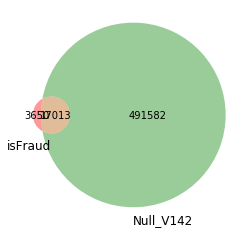

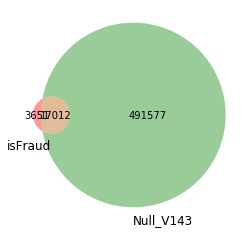

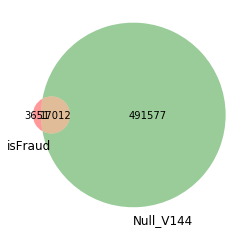

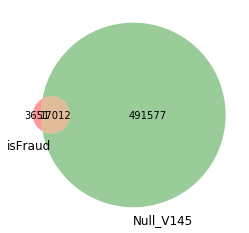

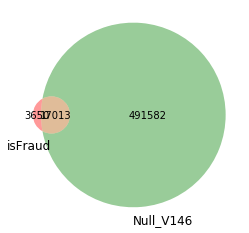

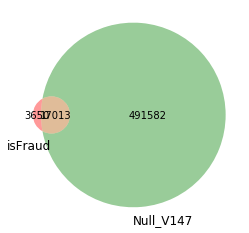

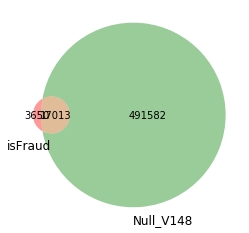

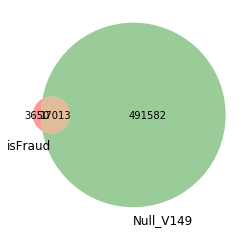

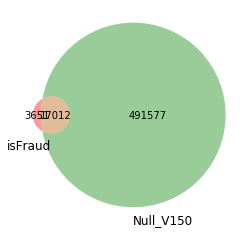

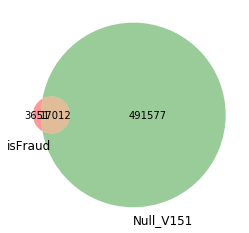

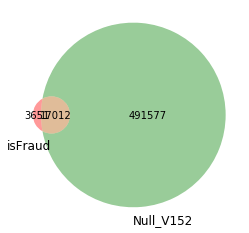

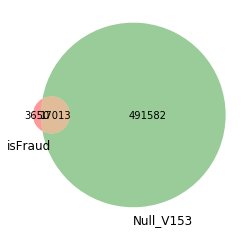

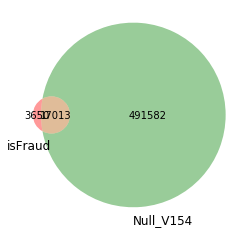

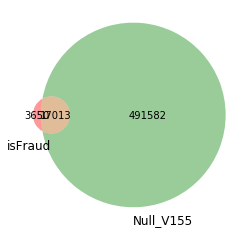

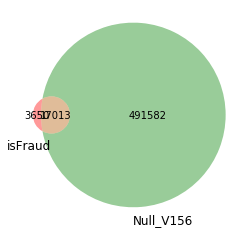

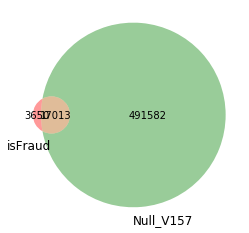

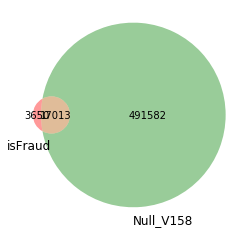

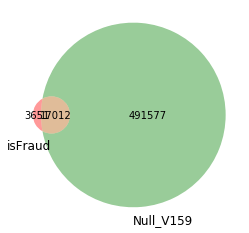

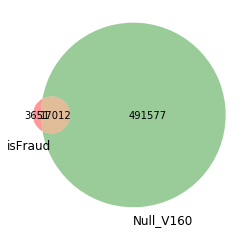

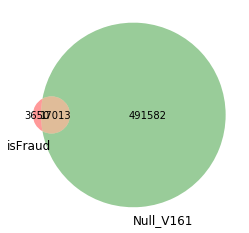

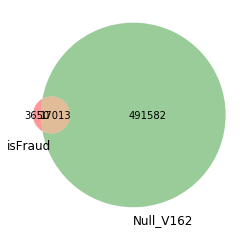

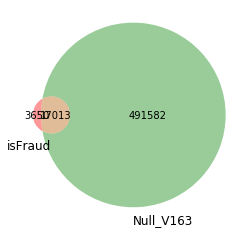

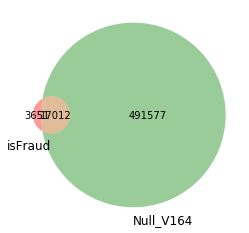

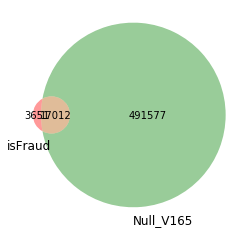

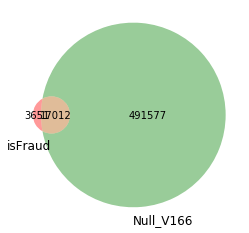

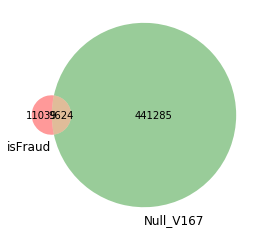

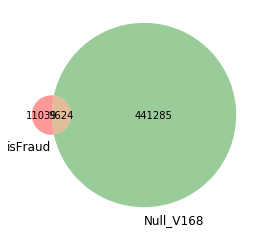

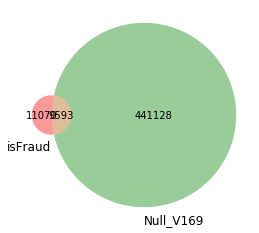

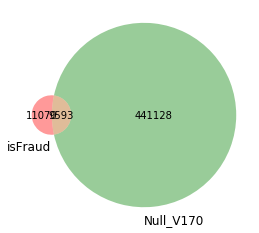

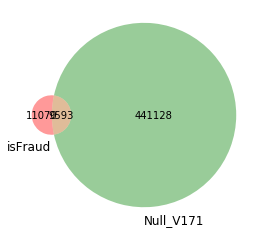

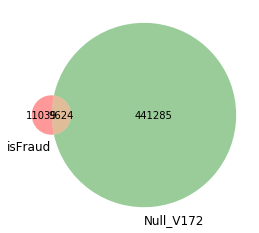

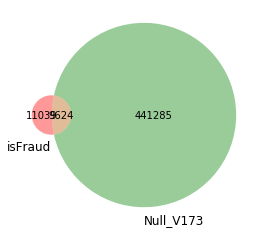

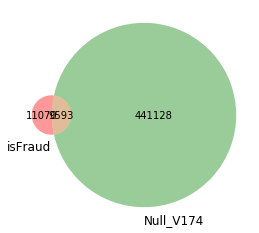

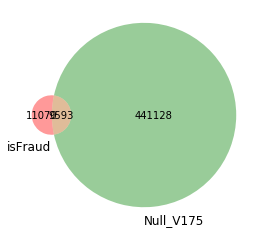

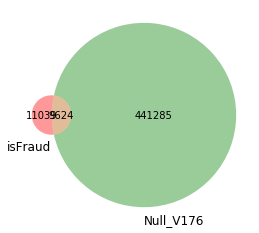

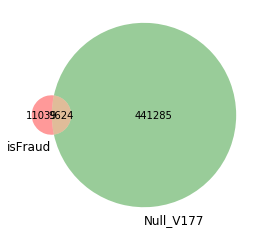

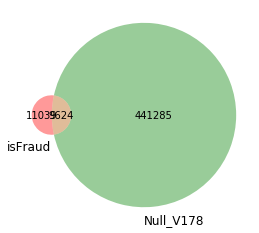

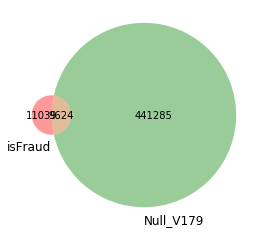

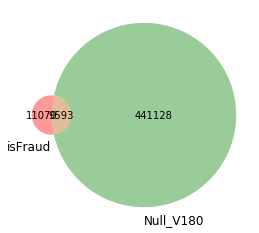

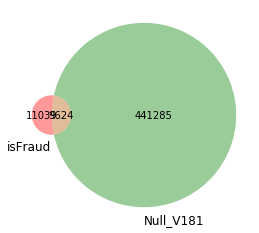

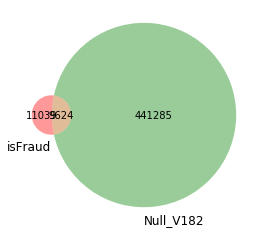

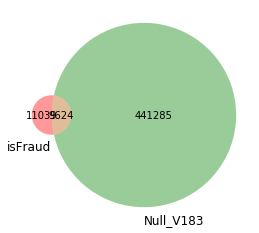

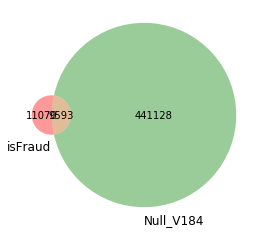

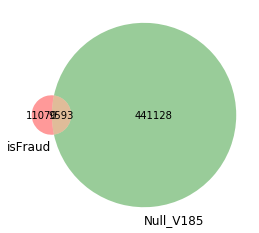

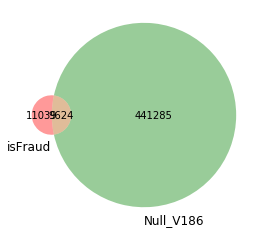

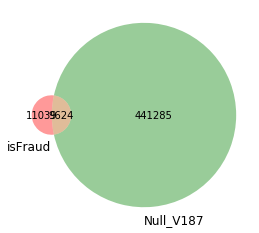

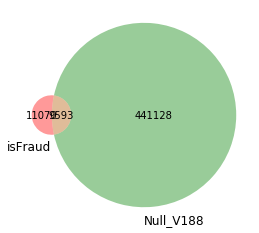

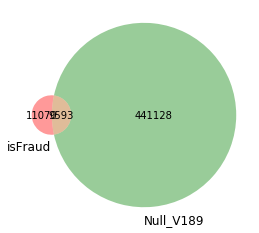

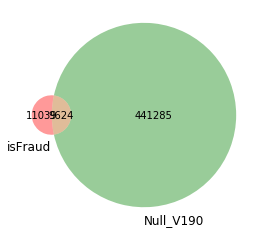

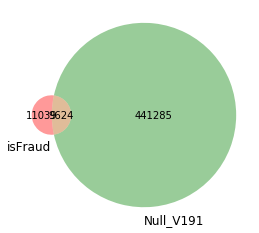

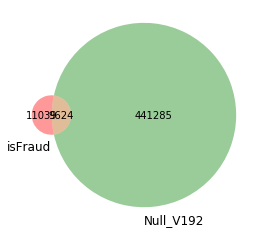

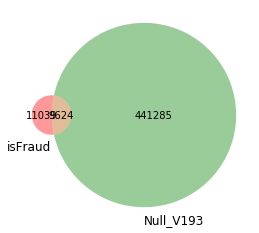

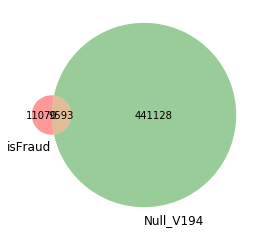

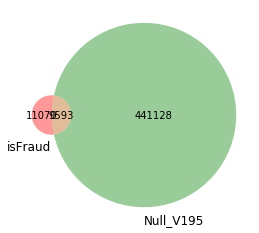

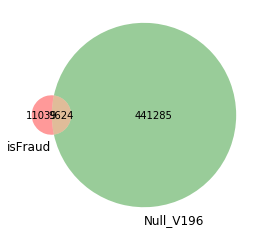

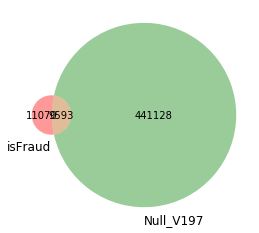

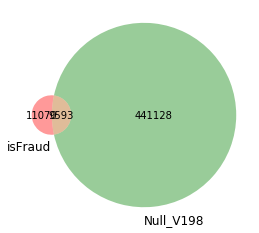

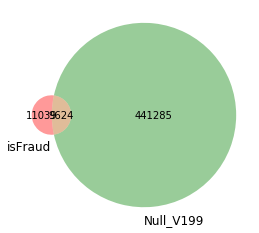

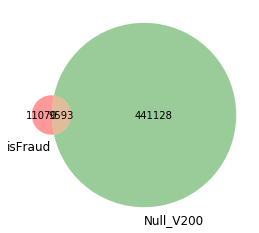

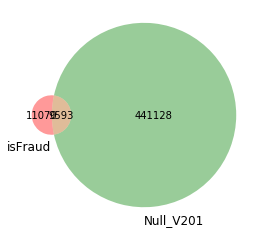

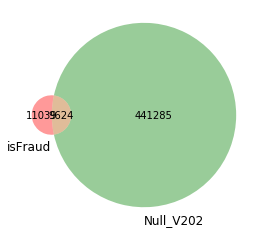

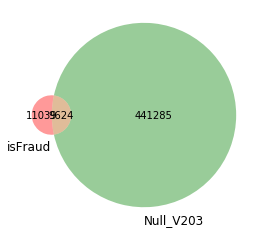

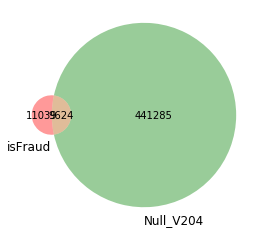

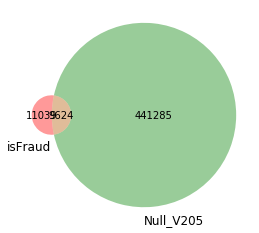

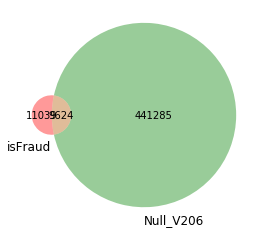

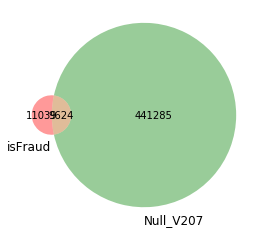

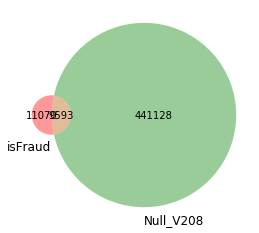

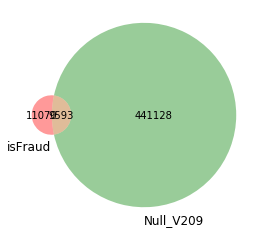

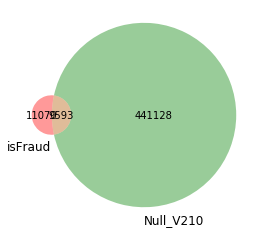

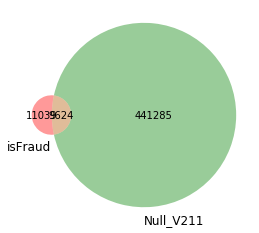

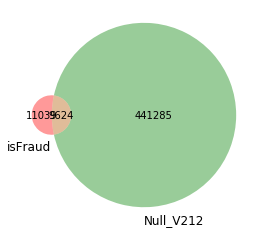

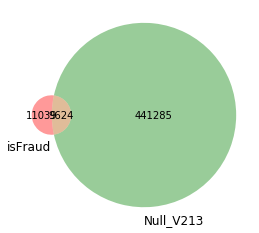

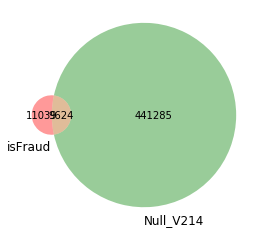

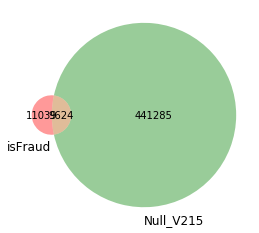

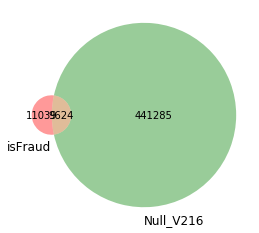

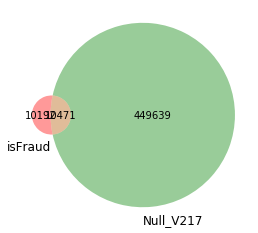

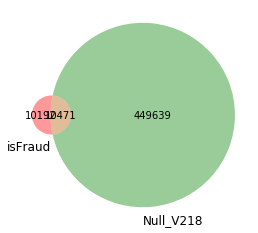

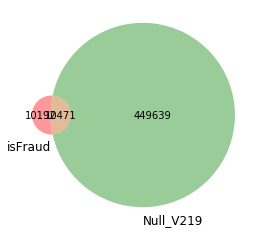

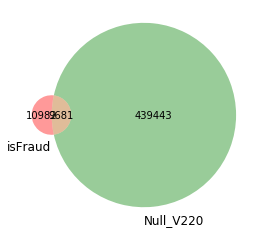

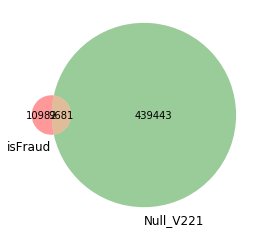

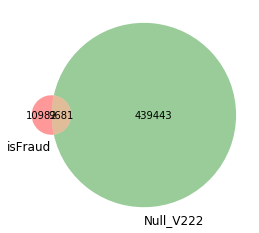

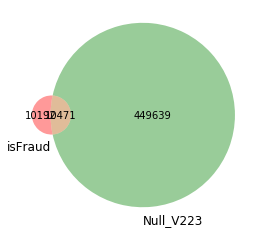

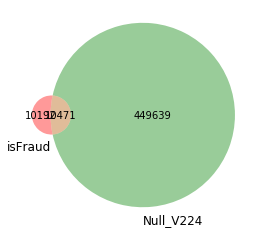

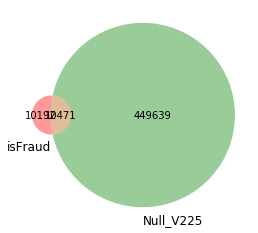

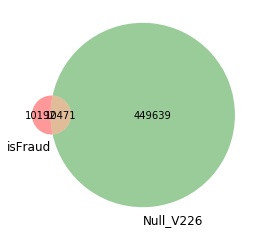

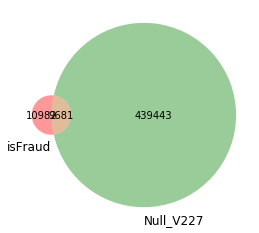

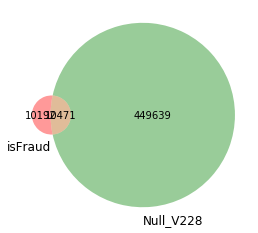

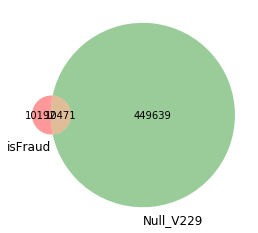

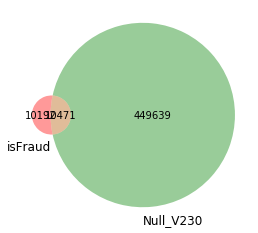

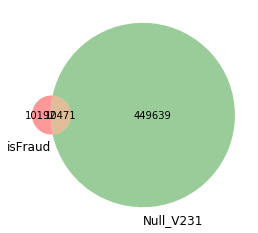

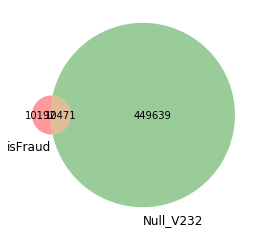

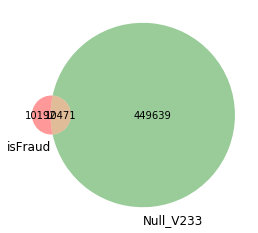

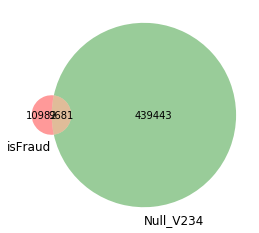

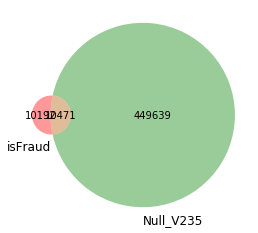

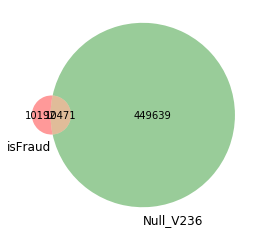

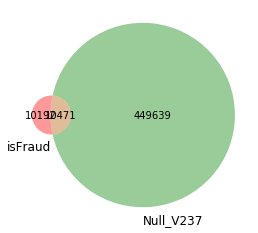

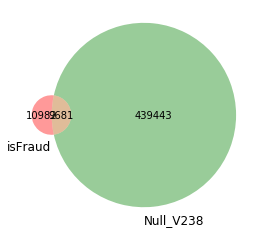

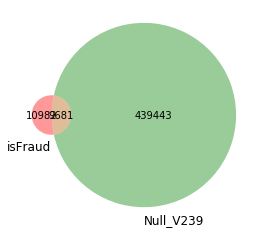

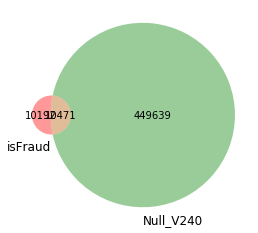

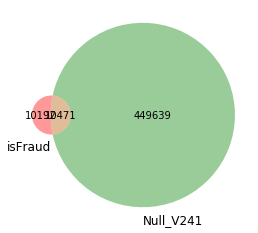

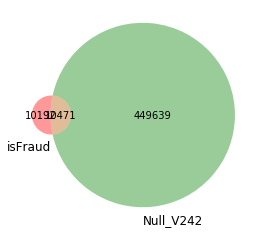

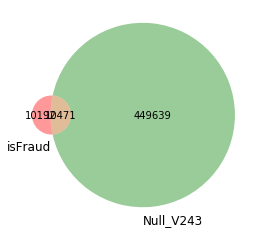

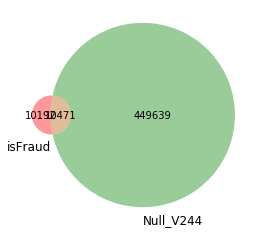

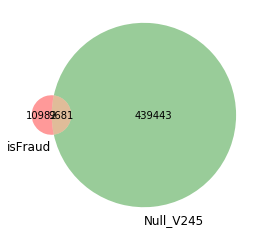

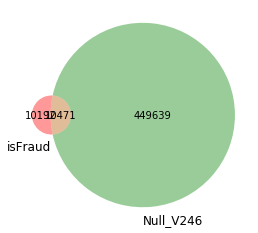

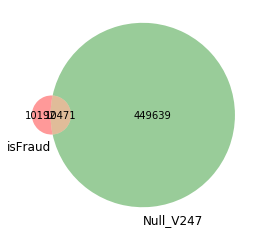

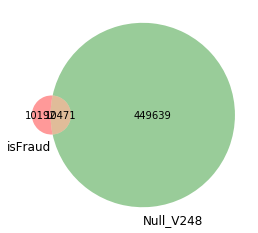

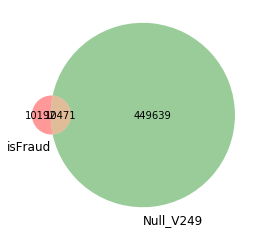

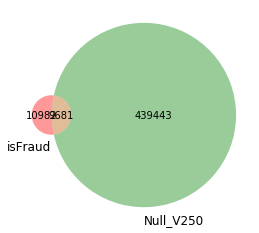

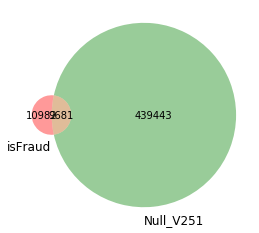

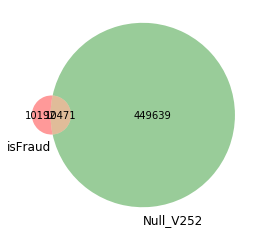

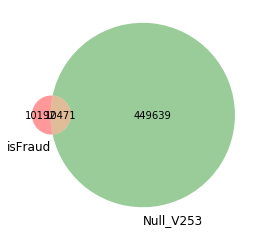

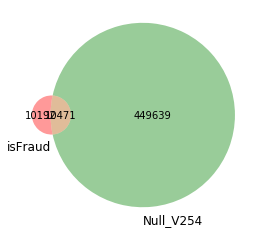

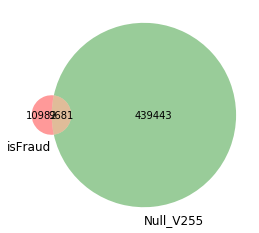

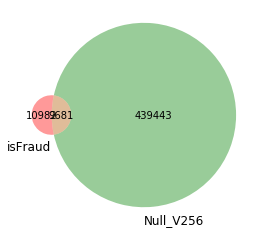

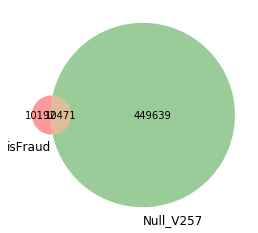

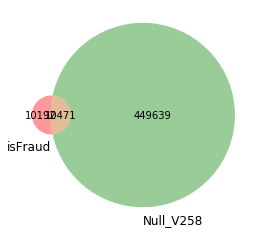

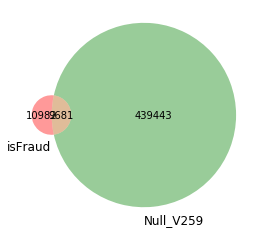

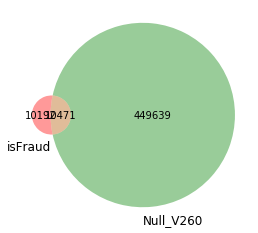

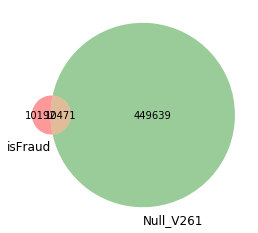

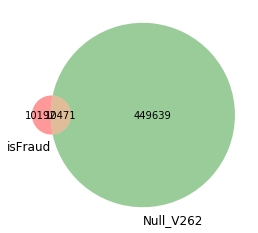

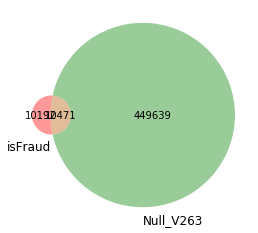

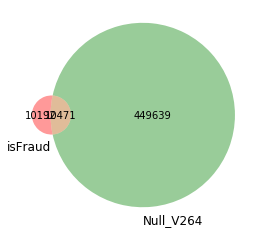

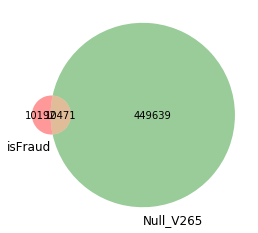

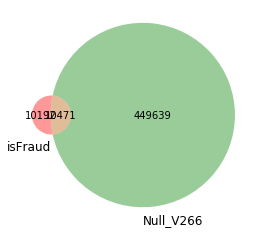

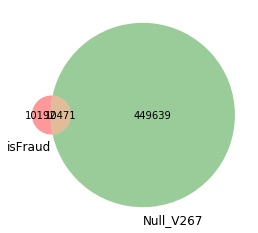

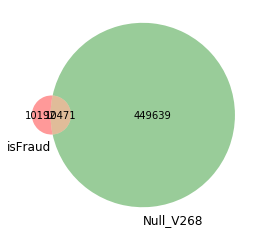

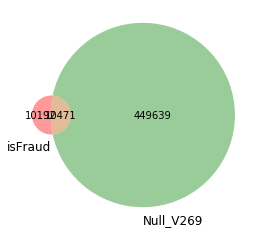

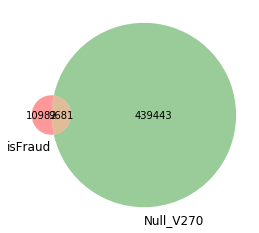

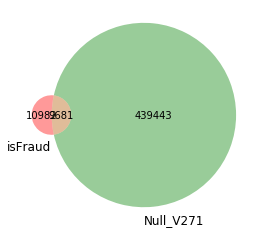

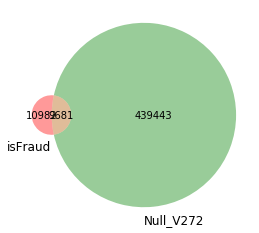

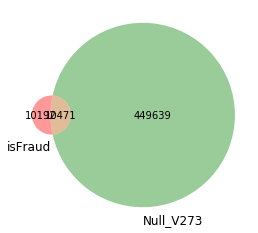

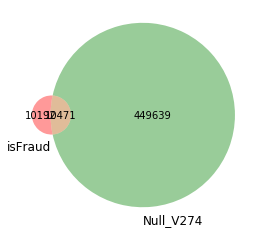

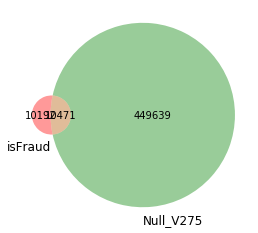

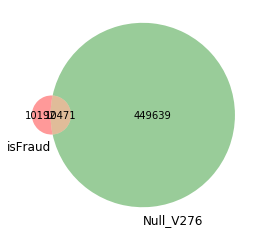

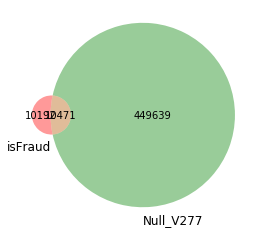

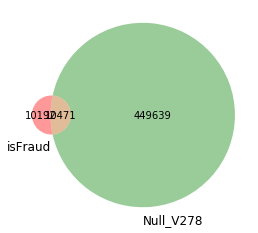

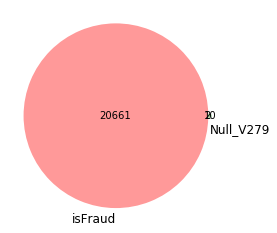

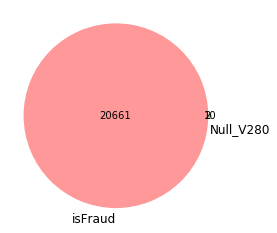

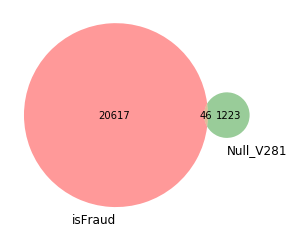

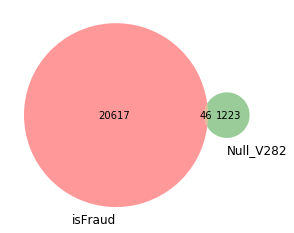

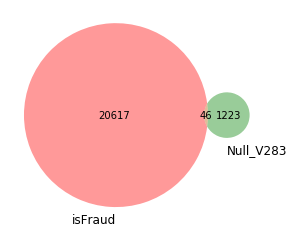

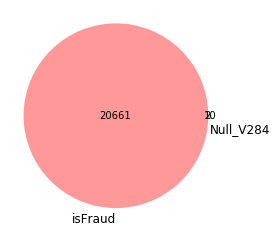

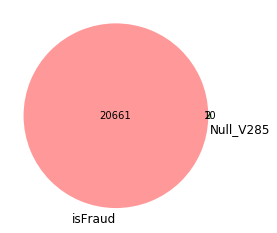

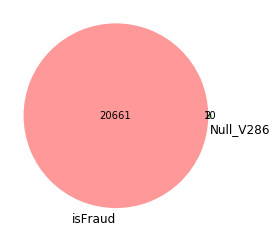

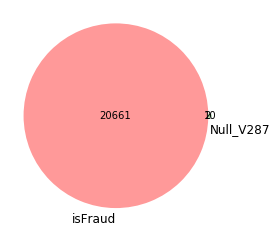

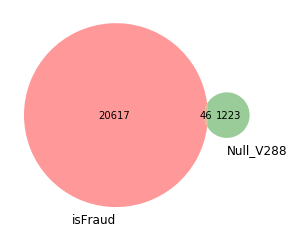

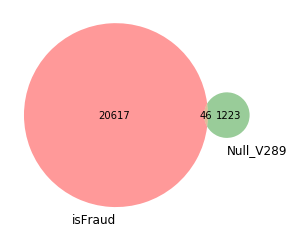

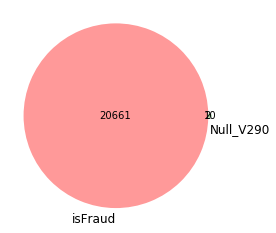

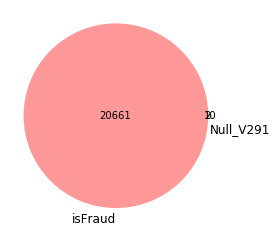

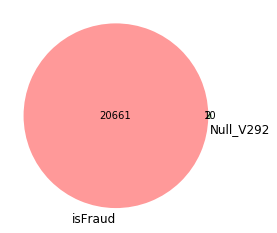

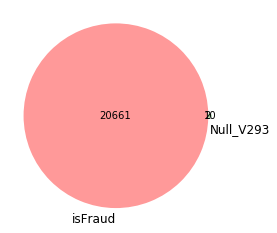

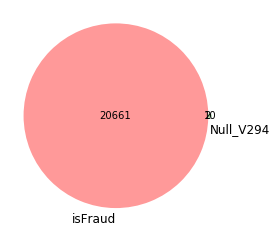

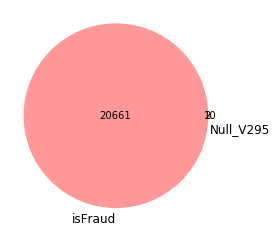

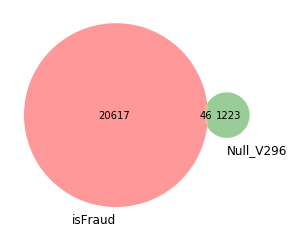

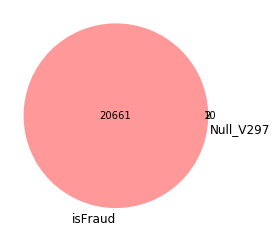

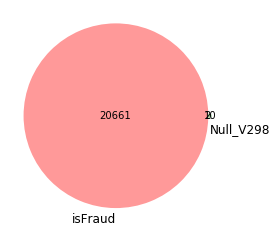

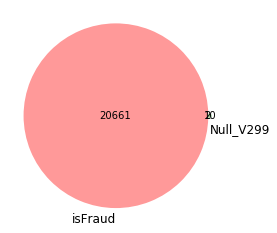

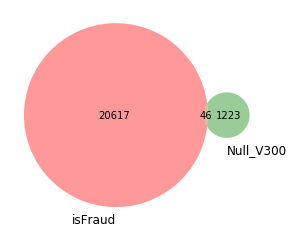

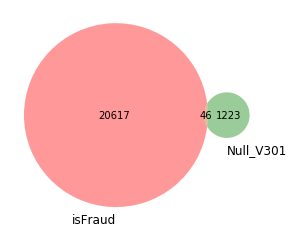

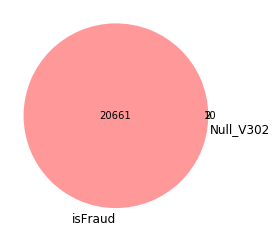

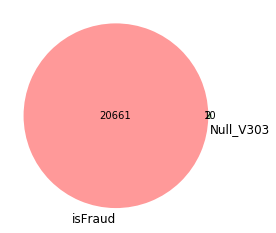

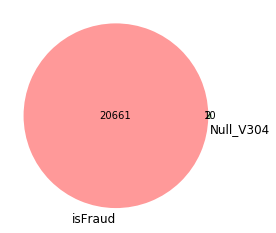

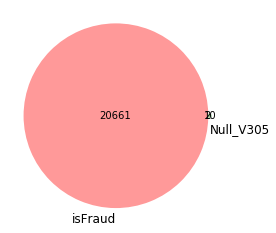

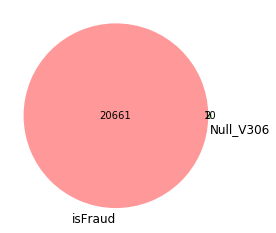

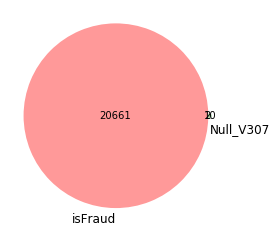

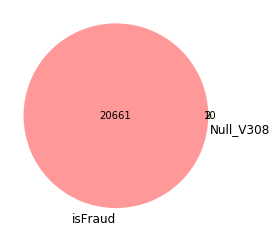

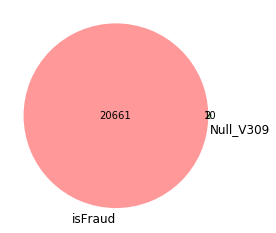

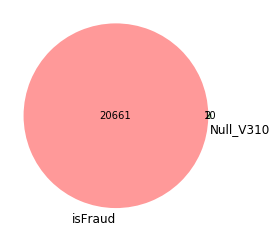

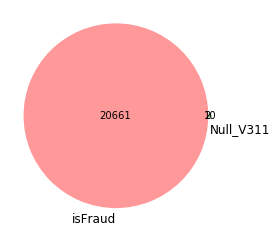

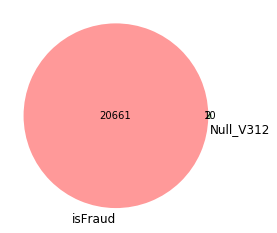

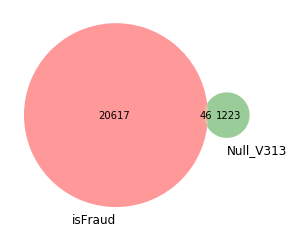

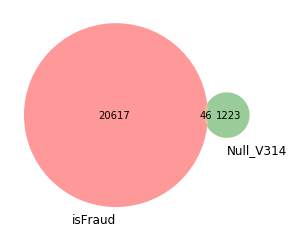

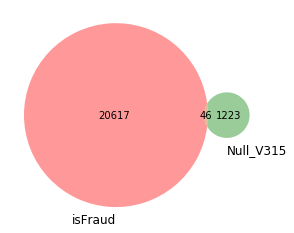

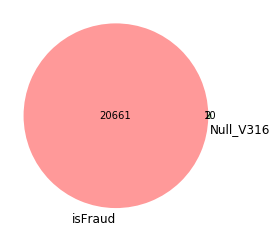

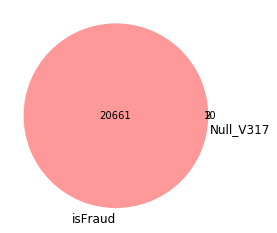

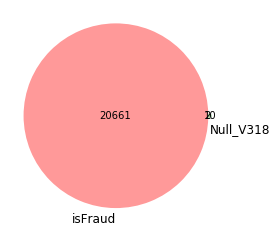

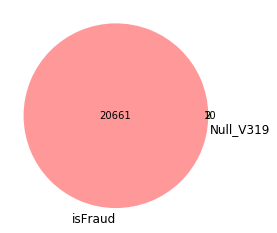

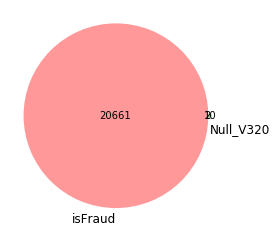

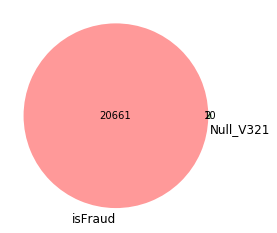

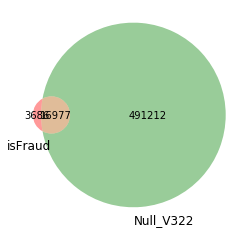

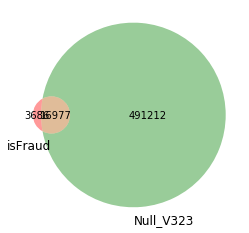

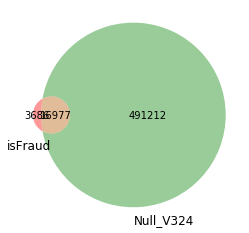

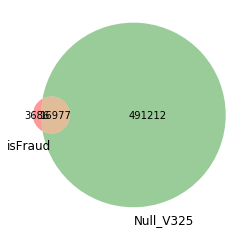

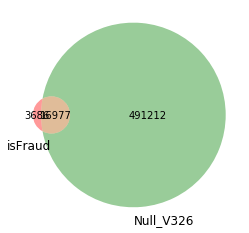

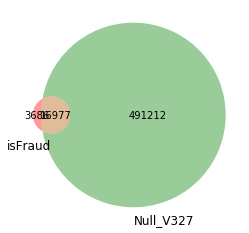

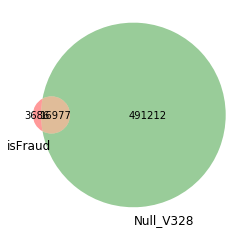

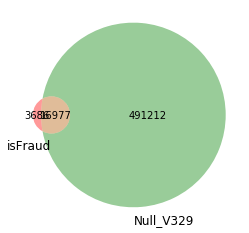

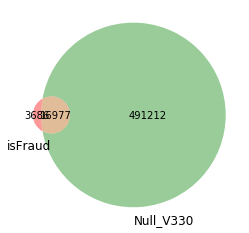

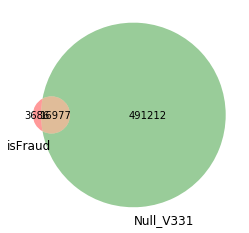

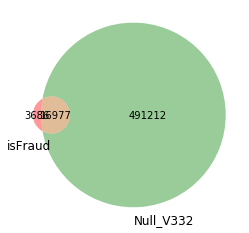

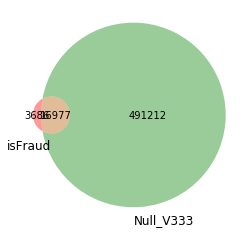

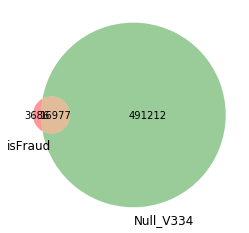

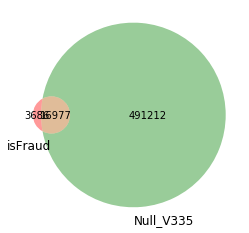

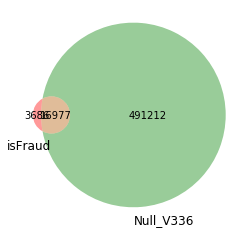

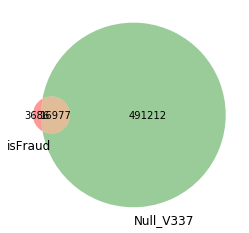

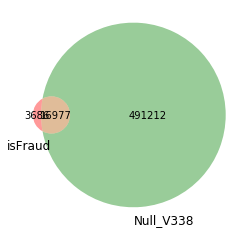

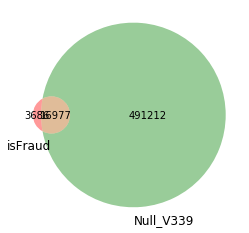

In [22]:
for colchk in df2.columns:
    try:
        venn2([set(df2.index[df2['isFraud'] == 1].tolist()),set(df2.index[df2[colchk].apply(np.isnan)].tolist())],set_labels=('isFraud','Null_{}'.format(colchk)))
        plt.show()
    except (TypeError):
        # isnan is not working on some columns. 
        # just passing them by for now.. Perhaps we need to re-cast those items
        # as NaNs? Or is there a value in "NotFound" ??
        print('TypeError caught on {}'.format(colchk))

(array([  2.,   0.,   0.,   0.,   1.,   0.,   1.,   8.,   4.,   3.,   1.,
          7.,   5.,   8.,   5.,   7.,  19.,  13.,  15.,  33.,  41.,  57.,
         66., 460., 203., 319., 260., 239., 262., 338., 403., 431., 306.,
        208., 260., 268., 148., 266., 140., 131.,  57.,  37.,  38.,  34.,
         18.,  14.,   9.,   1.,   6.,   1.,   1.,   0.,   0.,   0.,   1.]),
 array([-46.        , -44.05454545, -42.10909091, -40.16363636,
        -38.21818182, -36.27272727, -34.32727273, -32.38181818,
        -30.43636364, -28.49090909, -26.54545455, -24.6       ,
        -22.65454545, -20.70909091, -18.76363636, -16.81818182,
        -14.87272727, -12.92727273, -10.98181818,  -9.03636364,
         -7.09090909,  -5.14545455,  -3.2       ,  -1.25454545,
          0.69090909,   2.63636364,   4.58181818,   6.52727273,
          8.47272727,  10.41818182,  12.36363636,  14.30909091,
         16.25454545,  18.2       ,  20.14545455,  22.09090909,
         24.03636364,  25.98181818,  27.92727273,  2

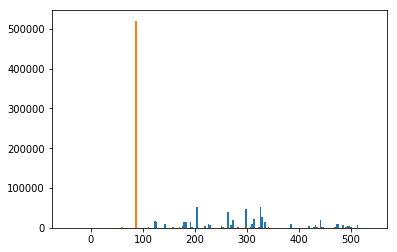

In [23]:
plt.hist(x=df2[~np.isnan(df2.addr1)].addr1,bins='auto')
plt.hist(x=df2[~np.isnan(df2.addr2)].addr2,bins='auto')
plt.hist(x=df1[~np.isnan(df1.id_07)].id_07,bins='auto')


#Applying np.unique does not work for python objects. 
# best to use pandas.unique() function as
# later discovered.

print(a,c = np.unique(df1['id_12'],return_counts=True))
print(c.sort())
print(a.dtype)
print(a[~np.isnan(a.astype('U10'))].shape[0])
print(c)
print(df1[~np.isnan(df1['id_11'])]['id_11'].shape[0])
print(len(c))
print(len(a))
print(df1['id_07'].size)

In [ ]:
category_thresh=0.001 #If a column has <1% of total as unique items it's a category
for col in df1.columns:
    #print('Working on ',col)
    #print(c.dtype)
    #print(len(c))
    #print(df1[col].size)
    if df1[col].unique().size/df1[col].count() < category_thresh:
        print(col + ' seems to be a category')
        df1[col] = df1[col].astype('category').cat.codes

for col in df2.columns:
    categ_ratio = df2[col].unique().size/df2[col].count()
    if categ_ratio < category_thresh:
        print(col + ' is a category. Ratio: ' + str(categ_ratio))
        df2[col] = df2[col].astype('category').cat.codes
    else:
        print(col + ' not a category. Ratio: ' + str(categ_ratio))
            

pd.options.display.max_columns = None

In [24]:
splitter = np.random.choice([0, 1], 5, p=[0.5, 0.5])
print(splitter)
s = pd.Series(pd.Categorical.from_codes(splitter,categories=["train", "test"]))
print(s)

device=df1['DeviceInfo']

id_01 seems to be a category
id_03 seems to be a category
id_04 seems to be a category
id_05 seems to be a category
id_06 seems to be a category
id_09 seems to be a category
id_10 seems to be a category
id_12 seems to be a category
id_13 seems to be a category
id_14 seems to be a category
id_15 seems to be a category
id_16 seems to be a category
id_17 seems to be a category
id_18 seems to be a category
id_23 seems to be a category
id_27 seems to be a category
id_28 seems to be a category
id_29 seems to be a category
id_30 seems to be a category
id_31 seems to be a category
id_32 seems to be a category
id_34 seems to be a category
id_35 seems to be a category
id_36 seems to be a category
id_37 seems to be a category
id_38 seems to be a category
DeviceType seems to be a category
isFraud seems to be a category
isFraud is a category. Ratio: 3.3867307887696006e-06
TransactionDT not a category. Ratio: 0.9708893555051309
TransactionAmt not a category. Ratio: 0.035394723473431096
ProductCD is 

V99 is a category. Ratio: 0.0001524839637698102
V100 is a category. Ratio: 5.082798792327007e-05
V101 not a category. Ratio: 0.001475705916038941
V102 not a category. Ratio: 0.002178826415644177
V103 not a category. Ratio: 0.0015739733593572631
V104 is a category. Ratio: 2.880252648985304e-05
V105 is a category. Ratio: 0.00017112089267500924
V106 is a category. Ratio: 9.657317705421313e-05
V107 is a category. Ratio: 5.082798792327007e-06
V108 is a category. Ratio: 1.524839637698102e-05
V109 is a category. Ratio: 1.524839637698102e-05
V110 is a category. Ratio: 1.524839637698102e-05
V111 is a category. Ratio: 1.8636928905199026e-05
V112 is a category. Ratio: 1.8636928905199026e-05
V113 is a category. Ratio: 1.8636928905199026e-05
V114 is a category. Ratio: 1.3554130112872019e-05
V115 is a category. Ratio: 1.3554130112872019e-05
V116 is a category. Ratio: 1.3554130112872019e-05
V117 is a category. Ratio: 8.471331320545012e-06
V118 is a category. Ratio: 8.471331320545012e-06
V119 is a cat

V272 not a category. Ratio: 0.01773490976975731
V273 not a category. Ratio: 0.055033351222878175
V274 not a category. Ratio: 0.06375833780571954
V275 not a category. Ratio: 0.05962585294794143
V276 not a category. Ratio: 0.017357969792225716
V277 not a category. Ratio: 0.019481714329525415
V278 not a category. Ratio: 0.018393007743617264
V279 not a category. Ratio: 0.001493578627939742
V280 not a category. Ratio: 0.0016527582096022542
V281 is a category. Ratio: 4.0728289700324636e-05
V282 is a category. Ratio: 5.7698410408793236e-05
V283 is a category. Ratio: 0.00010691176046335218
V284 is a category. Ratio: 2.3707597268884793e-05
V285 is a category. Ratio: 0.0001642597810772732
V286 is a category. Ratio: 1.6933998049203424e-05
V287 is a category. Ratio: 5.58821935623713e-05
V288 is a category. Ratio: 2.0364144850162318e-05
V289 is a category. Ratio: 2.375816899185604e-05
V290 is a category. Ratio: 9.99105884903002e-05
V291 is a category. Ratio: 0.0003725479570824753
V292 is a category

In [25]:
device.head

<bound method NDFrame.head of TransactionID
2987004         SAMSUNG SM-G892A Build/NRD90M
2987008                            iOS Device
2987010                               Windows
2987011                                   NaN
2987016                                 MacOS
2987017                               Windows
2987022                                   NaN
2987038                                   NaN
2987040                               Windows
2987048                               Windows
2987049                               Windows
2987057                 SM-G930V Build/NRD90M
2987066                               Windows
2987069                                   NaN
2987070                            iOS Device
2987072               BLADE A602 Build/MRA58K
2987074                               Windows
2987084                               Windows
2987093                               Windows
2987099                            iOS Device
2987100                 SM-G930V Bui

In [26]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(device.dropna())

In [27]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
kmeans = KMeans(n_clusters=10).fit(tfidf)

In [29]:
device_code = kmeans.predict(tfidf_vectorizer.transform(device.dropna()))

In [30]:
device_code[:200]

array([3, 1, 0, 2, 0, 0, 0, 0, 3, 0, 1, 5, 0, 0, 0, 1, 3, 2, 3, 5, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 5, 0, 0, 0, 1, 1, 1, 0, 3, 1,
       5, 5, 5, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 5, 2, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 5, 2, 2, 1, 7, 2, 2, 3, 8, 2, 2, 8, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 5, 0, 1, 0, 5, 4, 7, 0, 3, 1, 3, 1, 0, 0, 2, 0, 5,
       1, 0, 0, 2, 0, 2, 4, 6, 1, 5, 1, 1, 1, 1, 1, 2, 0, 0, 1, 5, 4, 1,
       0, 1, 0, 0, 0, 1, 0, 5, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 5, 1,
       0, 5, 0, 3, 2, 0, 5, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 2, 5, 2, 0,
       5, 0, 1, 0, 2, 0, 7, 3, 0, 2, 0, 0, 5, 5, 5, 5, 0, 1, 1, 0, 5, 5,
       5, 1])

In [33]:
dev_zip = dict(zip(device.to_list(),device_code))
print(dev_zip)

{'SAMSUNG SM-G892A Build/NRD90M': 9, 'iOS Device': 5, 'Windows': 2, nan: 5, 'MacOS': 9, 'SM-G930V Build/NRD90M': 7, 'BLADE A602 Build/MRA58K': 0, 'XT1635-02 Build/NPN26.118-22-2': 0, 'Z970': 1, 'SM-N920V Build/NRD90M': 2, 'Redmi Note 4 Build/MMB29M': 5, 'Lenovo PB1-750M Build/S100': 5, 'LT22i Build/6.2.A.1.100': 0, 'rv:52.0': 4, 'SM-G950U Build/NRD90M': 4, 'LG-H872 Build/NRD90U': 1, 'LG-K500 Build/MMB29M': 9, 'SM-P550 Build/MMB29M': 5, 'SM-J700M Build/MMB29K': 1, 'Trident/7.0': 0, 'rv:57.0': 0, 'SAMSUNG SM-G930T Build/NRD90M': 7, 'Blade V6 Plus Build/MRA58K': 0, 'BLL-L23 Build/HUAWEIBLL-L23': 0, 'KYOCERA-C6742A Build/LMY47V': 0, 'F3113 Build/33.2.A.4.70': 2, 'D5306 Build/19.4.A.0.182': 0, 'M4 SS4457 Build/MRA58K': 2, 'SM-G955U Build/NRD90M': 4, 'SM-G610M Build/MMB29K': 4, 'SAMSUNG SM-G935F Build/NRD90M': 2, 'XT1635-01': 0, 'rv:56.0': 0, 'VS500': 0, 'CAM-L03 Build/HUAWEICAM-L03': 8, 'RCT6303W87M7 Build/MRA58K': 5, 'M4 SS4451 Build/LMY47D': 0, 'KFFOWI Build/LVY48F': 5, 'Moto E (4) Build/

In [36]:
df1['DeviceInfo'] = df1['DeviceInfo'].fillna(-1).replace(dev_zip)
#device_coded.head

In [39]:
tfidf = tfidf_vectorizer.fit_transform(df1['id_33'].dropna())
kmeans = KMeans(n_clusters=20).fit(tfidf)
resolution = kmeans.predict(tfidf_vectorizer.transform(df1['id_33'].dropna()))
res_zip = dict(zip(df1['id_33'].to_list(),resolution))
print(res_zip)

{'2220x1080': 1, '1334x750': 1, nan: 11, '1280x800': 8, '1366x768': 17, '1920x1080': 5, '1680x1050': 1, '1136x640': 13, '5120x2880': 5, '2880x1800': 9, '1920x1200': 1, '2560x1600': 2, '2048x1536': 1, '1024x768': 10, '1280x720': 1, '2560x1440': 19, '2208x1242': 5, '2001x1125': 8, '1440x900': 16, '1600x900': 3, '2672x1440': 1, '1280x1024': 13, '960x540': 6, '2732x2048': 4, '2436x1125': 0, '2048x1152': 6, '2960x1440': 0, '1024x600': 1, '855x480': 6, '4096x2304': 4, '2160x1440': 0, '2562x1442': 14, '801x480': 6, '2736x1824': 1, '3441x1440': 3, '2880x1620': 1, '3840x2160': 1, '1638x922': 3, '1280x768': 9, '1360x768': 4, '1280x960': 0, '3440x1440': 2, '1152x720': 4, '1280x1025': 4, '3360x2100': 8, '2304x1296': 7, '1152x864': 18, '3200x1800': 4, '2112x1188': 6, '2224x1668': 1, '2400x1350': 0, '2000x1125': 6, '1600x1000': 11, '2560x1080': 17, '1728x972': 1, '3000x2000': 0, '1024x640': 12, '3840x2400': 15, '2304x1440': 9, '1280x600': 1, '1400x1050': 15, '1600x1200': 8, '3201x1800': 14, '1356x90